In [1]:
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from operator import attrgetter
import squarify
sns.set_style('whitegrid')
palette = 'Set2'
import time 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 800)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from scipy.stats import boxcox, yeojohnson
# import category encoders

import category_encoders as ce

In [2]:
%%time
df = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\sms_rf_model_v1\20231006_tmp_sms_rf_model_final_base.csv', low_memory=False)

CPU times: total: 3.05 s
Wall time: 3.12 s


In [3]:
df.nunique()

msisdn                         483522
sms_5_cust                          2
sms_10_cust                         2
sms_25_cust                         2
sms_125_cust                        2
sms_200_cust                        2
sms_300_cust                        2
flag_final                          2
region                              9
sms_distinct_days                  32
overall_cust_segment                3
data_usage                     288797
voice_usage                     81065
sms_usage                        2173
sms_revenue                    163635
total_revenue                  478532
gender                              3
device_type                        15
dual_sim                            3
age                               328
aon                                15
smb_min_value                      31
smb_max_value                       1
smb_avg_value                    3239
dfb_min_value                      31
dfb_max_value                       1
dfb_avg_valu

In [4]:
df.head()

,msisdn,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
0,263771000457,0,0,0,1,0,0,0,Harare South,10,LVC,0.489,138.600,31,2616.667,32103.497,Female,Smartphone,N,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19
1,263771000681,1,0,0,0,0,0,0,Harare North,2,LVC,0.000,162.633,9,95.630,35424.369,Male,Mobile Phone/Feature phone,Y,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19
2,263771001005,0,0,1,0,0,0,0,Mashonaland East + CZA,26,MVC,0.056,203.150,366,5402.370,54022.529,Male,Smartphone,Y,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20
3,263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,17,LVC,0.000,51.200,69,1615.240,12592.710,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20
4,263771001109,1,0,0,0,0,0,0,Mashonaland C + W,9,LVC,0.303,19.533,37,210.674,11537.987,Male,Unmapped,Unmapped,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21


In [5]:
df.isnull().sum()

msisdn                              0
sms_5_cust                          0
sms_10_cust                         0
sms_25_cust                         0
sms_125_cust                        0
sms_200_cust                        0
sms_300_cust                        0
flag_final                          0
region                              0
sms_distinct_days                   0
overall_cust_segment                0
data_usage                          0
voice_usage                         0
sms_usage                           0
sms_revenue                         0
total_revenue                       0
gender                              0
device_type                         0
dual_sim                            0
age                              6527
aon                              5893
smb_min_value                       0
smb_max_value                       0
smb_avg_value                       0
dfb_min_value                       0
dfb_max_value                       0
dfb_avg_valu

In [6]:
%%time 
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70,'-'))
    print(dataframe.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]).T)
    
check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 483522
Columns: 31
------------------------------- TYPES --------------------------------
msisdn                           int64
sms_5_cust                       int64
sms_10_cust                      int64
sms_25_cust                      int64
sms_125_cust                     int64
sms_200_cust                     int64
sms_300_cust                     int64
flag_final                       int64
region                          object
sms_distinct_days                int64
overall_cust_segment            object
data_usage                     float64
voice_usage                    float64
sms_usage                        int64
sms_revenue                    float64
total_revenue                  float64
gender                          object
device_type                     object
dual_sim                        object
age                            float64
aon                            float64
smb_min_value 

In [7]:
%%time
df1 = df[(df['age'] > 0) & (df['age'] <= 99) & (df['aon'] <= 15) & (df['gender'] != "Unknown")]


CPU times: total: 188 ms
Wall time: 212 ms


In [8]:
df1.nunique()

msisdn                         474084
sms_5_cust                          2
sms_10_cust                         2
sms_25_cust                         2
sms_125_cust                        2
sms_200_cust                        2
sms_300_cust                        2
flag_final                          2
region                              9
sms_distinct_days                  32
overall_cust_segment                3
data_usage                     283618
voice_usage                     80561
sms_usage                        2166
sms_revenue                    161024
total_revenue                  469277
gender                              2
device_type                        15
dual_sim                            3
age                                97
aon                                14
smb_min_value                      31
smb_max_value                       1
smb_avg_value                    3226
dfb_min_value                      31
dfb_max_value                       1
dfb_avg_valu

In [9]:
df1.head()

,msisdn,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
0,263771000457,0,0,0,1,0,0,0,Harare South,10,LVC,0.489,138.600,31,2616.667,32103.497,Female,Smartphone,N,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19
1,263771000681,1,0,0,0,0,0,0,Harare North,2,LVC,0.000,162.633,9,95.630,35424.369,Male,Mobile Phone/Feature phone,Y,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19
2,263771001005,0,0,1,0,0,0,0,Mashonaland East + CZA,26,MVC,0.056,203.150,366,5402.370,54022.529,Male,Smartphone,Y,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20
3,263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,17,LVC,0.000,51.200,69,1615.240,12592.710,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20
4,263771001109,1,0,0,0,0,0,0,Mashonaland C + W,9,LVC,0.303,19.533,37,210.674,11537.987,Male,Unmapped,Unmapped,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21


In [10]:
483522-474084

9438

In [11]:
df1.columns

Index(['msisdn', 'sms_5_cust', 'sms_10_cust', 'sms_25_cust', 'sms_125_cust', 'sms_200_cust', 'sms_300_cust', 'flag_final', 'region', 'sms_distinct_days', 'overall_cust_segment', 'data_usage', 'voice_usage', 'sms_usage', 'sms_revenue', 'total_revenue', 'gender', 'device_type', 'dual_sim', 'age', 'aon', 'smb_min_value', 'smb_max_value', 'smb_avg_value', 'dfb_min_value', 'dfb_max_value', 'dfb_avg_value', 'utilization_rate_percentage', 'effective_rate_percentage', 'recharges_by_others_in_usd', 'region_conv_rate'], dtype='object')

In [12]:
# Assuming you want to drop multiple columns ['column1', 'column2', 'column3']
#columns_to_drop = ['smb_min_value', 'smb_max_value', 'smb_avg_value', 'dfb_min_value', 'dfb_max_value', 'dfb_avg_value','recharges_by_others_in_usd']
#df1 = df1.drop(columns=columns_to_drop, axis=1)


In [13]:
df1.head()

,msisdn,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
0,263771000457,0,0,0,1,0,0,0,Harare South,10,LVC,0.489,138.600,31,2616.667,32103.497,Female,Smartphone,N,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19
1,263771000681,1,0,0,0,0,0,0,Harare North,2,LVC,0.000,162.633,9,95.630,35424.369,Male,Mobile Phone/Feature phone,Y,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19
2,263771001005,0,0,1,0,0,0,0,Mashonaland East + CZA,26,MVC,0.056,203.150,366,5402.370,54022.529,Male,Smartphone,Y,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20
3,263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,17,LVC,0.000,51.200,69,1615.240,12592.710,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20
4,263771001109,1,0,0,0,0,0,0,Mashonaland C + W,9,LVC,0.303,19.533,37,210.674,11537.987,Male,Unmapped,Unmapped,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474084 entries, 0 to 483521
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   msisdn                       474084 non-null  int64  
 1   sms_5_cust                   474084 non-null  int64  
 2   sms_10_cust                  474084 non-null  int64  
 3   sms_25_cust                  474084 non-null  int64  
 4   sms_125_cust                 474084 non-null  int64  
 5   sms_200_cust                 474084 non-null  int64  
 6   sms_300_cust                 474084 non-null  int64  
 7   flag_final                   474084 non-null  int64  
 8   region                       474084 non-null  object 
 9   sms_distinct_days            474084 non-null  int64  
 10  overall_cust_segment         474084 non-null  object 
 11  data_usage                   474084 non-null  float64
 12  voice_usage                  474084 non-null  float64
 13 

In [15]:
%%time 
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70,'-'))
    print(dataframe.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]).T)
    
check_df(df1)

------------------------------- SHAPE --------------------------------
Rows: 474084
Columns: 31
------------------------------- TYPES --------------------------------
msisdn                           int64
sms_5_cust                       int64
sms_10_cust                      int64
sms_25_cust                      int64
sms_125_cust                     int64
sms_200_cust                     int64
sms_300_cust                     int64
flag_final                       int64
region                          object
sms_distinct_days                int64
overall_cust_segment            object
data_usage                     float64
voice_usage                    float64
sms_usage                        int64
sms_revenue                    float64
total_revenue                  float64
gender                          object
device_type                     object
dual_sim                        object
age                            float64
aon                            float64
smb_min_value 

In [16]:
df1.columns

Index(['msisdn', 'sms_5_cust', 'sms_10_cust', 'sms_25_cust', 'sms_125_cust', 'sms_200_cust', 'sms_300_cust', 'flag_final', 'region', 'sms_distinct_days', 'overall_cust_segment', 'data_usage', 'voice_usage', 'sms_usage', 'sms_revenue', 'total_revenue', 'gender', 'device_type', 'dual_sim', 'age', 'aon', 'smb_min_value', 'smb_max_value', 'smb_avg_value', 'dfb_min_value', 'dfb_max_value', 'dfb_avg_value', 'utilization_rate_percentage', 'effective_rate_percentage', 'recharges_by_others_in_usd', 'region_conv_rate'], dtype='object')

In [17]:
df1.flag_final.value_counts()

0    365972
1    108112
Name: flag_final, dtype: int64

In [18]:
df_numerical = df1.select_dtypes(include=np.number)
df_numerical.head()

,msisdn,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
0,263771000457,0,0,0,1,0,0,0,10,0.489,138.600,31,2616.667,32103.497,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19
1,263771000681,1,0,0,0,0,0,0,2,0.000,162.633,9,95.630,35424.369,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19
2,263771001005,0,0,1,0,0,0,0,26,0.056,203.150,366,5402.370,54022.529,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20
3,263771001054,1,0,0,0,0,0,1,17,0.000,51.200,69,1615.240,12592.710,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20
4,263771001109,1,0,0,0,0,0,0,9,0.303,19.533,37,210.674,11537.987,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21


In [19]:
# we are setting the index to calling_nbr, as this is our primary key, and won't help at all with clustering
df_numerical.set_index('msisdn', inplace=True)
df_numerical.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,10,0.489,138.600,31,2616.667,32103.497,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19
263771000681,1,0,0,0,0,0,0,2,0.000,162.633,9,95.630,35424.369,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19
263771001005,0,0,1,0,0,0,0,26,0.056,203.150,366,5402.370,54022.529,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20
263771001054,1,0,0,0,0,0,1,17,0.000,51.200,69,1615.240,12592.710,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20
263771001109,1,0,0,0,0,0,0,9,0.303,19.533,37,210.674,11537.987,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21


In [20]:
df_categorical = df1.select_dtypes(exclude=np.number)
df_categorical.insert(0,'msisdn', df1['msisdn'])
df_categorical.set_index('msisdn', inplace=True)
df_categorical.head()

,region,overall_cust_segment,gender,device_type,dual_sim
msisdn,,,,,
263771000457,Harare South,LVC,Female,Smartphone,N
263771000681,Harare North,LVC,Male,Mobile Phone/Feature phone,Y
263771001005,Mashonaland East + CZA,MVC,Male,Smartphone,Y
263771001054,Mashonaland East + CZA,LVC,Female,Mobile Phone/Feature phone,Y
263771001109,Mashonaland C + W,LVC,Male,Unmapped,Unmapped


In [21]:
df1.region.unique()

array(['Harare South', 'Harare North', 'Mashonaland East + CZA',
       'Mashonaland C + W', 'Matebeleland', 'Manicaland', 'Unmapped',
       'Midlands', 'Masvingo'], dtype=object)

In [22]:
df1.shape

(474084, 31)

In [23]:
df_numerical.shape


(474084, 25)

In [24]:
df_categorical.shape

(474084, 5)

In [25]:
# to remove duplicates
df_numerical = df_numerical.loc[~df_numerical.index.duplicated(keep='first')]

In [26]:
df_numerical.shape

(474084, 25)

In [27]:
df_categorical = df_categorical.loc[~df_categorical.index.duplicated(keep='first')]

In [28]:
df_categorical.shape

(474084, 5)

In [29]:
# joining both df 
df_outliers_removed = pd.concat([df_numerical, df_categorical],axis=1, join='inner')
                                
df_outliers_removed.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate,region,overall_cust_segment,gender,device_type,dual_sim
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,10,0.489,138.600,31,2616.667,32103.497,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19,Harare South,LVC,Female,Smartphone,N
263771000681,1,0,0,0,0,0,0,2,0.000,162.633,9,95.630,35424.369,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19,Harare North,LVC,Male,Mobile Phone/Feature phone,Y
263771001005,0,0,1,0,0,0,0,26,0.056,203.150,366,5402.370,54022.529,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20,Mashonaland East + CZA,MVC,Male,Smartphone,Y
263771001054,1,0,0,0,0,0,1,17,0.000,51.200,69,1615.240,12592.710,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20,Mashonaland East + CZA,LVC,Female,Mobile Phone/Feature phone,Y
263771001109,1,0,0,0,0,0,0,9,0.303,19.533,37,210.674,11537.987,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21,Mashonaland C + W,LVC,Male,Unmapped,Unmapped


In [30]:
df_numerical = df_outliers_removed.select_dtypes(include=np.number)
df_new_features = df_numerical.copy()
df_new_features.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,10,0.489,138.600,31,2616.667,32103.497,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19
263771000681,1,0,0,0,0,0,0,2,0.000,162.633,9,95.630,35424.369,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19
263771001005,0,0,1,0,0,0,0,26,0.056,203.150,366,5402.370,54022.529,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20
263771001054,1,0,0,0,0,0,1,17,0.000,51.200,69,1615.240,12592.710,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20
263771001109,1,0,0,0,0,0,0,9,0.303,19.533,37,210.674,11537.987,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21


In [31]:
for col in df_new_features.columns:
    print(f"The minimum value of {col} is: ", min(df_new_features[col]))

The minimum value of sms_5_cust is:  0
The minimum value of sms_10_cust is:  0
The minimum value of sms_25_cust is:  0
The minimum value of sms_125_cust is:  0
The minimum value of sms_200_cust is:  0
The minimum value of sms_300_cust is:  0
The minimum value of flag_final is:  0
The minimum value of sms_distinct_days is:  0
The minimum value of data_usage is:  0.0
The minimum value of voice_usage is:  0.0
The minimum value of sms_usage is:  0
The minimum value of sms_revenue is:  58.241106
The minimum value of total_revenue is:  95.62999725341795
The minimum value of age is:  1.0
The minimum value of aon is:  0.0
The minimum value of smb_min_value is:  1
The minimum value of smb_max_value is:  99999
The minimum value of smb_avg_value is:  3226.7419354838707
The minimum value of dfb_min_value is:  1
The minimum value of dfb_max_value is:  99999
The minimum value of dfb_avg_value is:  3226.7419354838707
The minimum value of utilization_rate_percentage is:  0.0
The minimum value of effec

In [32]:
for col in df_new_features.columns:
    print(f"The minimum value of {col} is: ", max(df_new_features[col]))

The minimum value of sms_5_cust is:  1
The minimum value of sms_10_cust is:  1
The minimum value of sms_25_cust is:  1
The minimum value of sms_125_cust is:  1
The minimum value of sms_200_cust is:  1
The minimum value of sms_300_cust is:  1
The minimum value of flag_final is:  1
The minimum value of sms_distinct_days is:  31
The minimum value of data_usage is:  125.76611340790988
The minimum value of voice_usage is:  5114.383333333333
The minimum value of sms_usage is:  13286
The minimum value of sms_revenue is:  293248.53942187503
The minimum value of total_revenue is:  1652252.998003662
The minimum value of age is:  99.0
The minimum value of aon is:  13.0
The minimum value of smb_min_value is:  99999
The minimum value of smb_max_value is:  99999
The minimum value of smb_avg_value is:  99999.0
The minimum value of dfb_min_value is:  99999
The minimum value of dfb_max_value is:  99999
The minimum value of dfb_avg_value is:  99999.0
The minimum value of utilization_rate_percentage is: 

In [33]:
## Yeo Johnson Transform
#
df_new_features1 = pd.DataFrame()
for col in df_numerical.columns:
    
    df_new_features1[col] = df_numerical[col]
    

    #yeo_john_target, lam = yeojohnson(df_numerical[col])
    #
    #df_new_features1[col] = yeo_john_target
#
    #plt.rcParams["figure.figsize"] = 15,10
    #fig,ax = plt.subplots(1,2)
    #sns.distplot(df[col], color="r", ax=ax[0], axlabel="ORGINAL")
    #sns.distplot(df_new_features1[col], color="g", ax=ax[1], axlabel="YEO JOHNSON TRANSFORMED")
    #fig.suptitle(col, fontsize=18)
    #fig.legend()
    #plt.show()


In [34]:
df_transformed_data = pd.concat([df_new_features1, df_categorical], axis=1, join='inner')
df_transformed_data.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate,region,overall_cust_segment,gender,device_type,dual_sim
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,10,0.489,138.600,31,2616.667,32103.497,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19,Harare South,LVC,Female,Smartphone,N
263771000681,1,0,0,0,0,0,0,2,0.000,162.633,9,95.630,35424.369,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19,Harare North,LVC,Male,Mobile Phone/Feature phone,Y
263771001005,0,0,1,0,0,0,0,26,0.056,203.150,366,5402.370,54022.529,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20,Mashonaland East + CZA,MVC,Male,Smartphone,Y
263771001054,1,0,0,0,0,0,1,17,0.000,51.200,69,1615.240,12592.710,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20,Mashonaland East + CZA,LVC,Female,Mobile Phone/Feature phone,Y
263771001109,1,0,0,0,0,0,0,9,0.303,19.533,37,210.674,11537.987,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21,Mashonaland C + W,LVC,Male,Unmapped,Unmapped


In [35]:
df_numerical = df_transformed_data.select_dtypes(include=np.number)
df_numerical.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,10,0.489,138.600,31,2616.667,32103.497,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19
263771000681,1,0,0,0,0,0,0,2,0.000,162.633,9,95.630,35424.369,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19
263771001005,0,0,1,0,0,0,0,26,0.056,203.150,366,5402.370,54022.529,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20
263771001054,1,0,0,0,0,0,1,17,0.000,51.200,69,1615.240,12592.710,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20
263771001109,1,0,0,0,0,0,0,9,0.303,19.533,37,210.674,11537.987,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21


In [36]:
df_copy = df_transformed_data.copy()
df_copy.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate,region,overall_cust_segment,gender,device_type,dual_sim
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,10,0.489,138.600,31,2616.667,32103.497,48.000,11.000,99999,99999,99999.000,99999,99999,99999.000,2.400,0.124,NaN,19,Harare South,LVC,Female,Smartphone,N
263771000681,1,0,0,0,0,0,0,2,0.000,162.633,9,95.630,35424.369,54.000,10.000,99999,99999,99999.000,99999,99999,99999.000,60.000,3.137,NaN,19,Harare North,LVC,Male,Mobile Phone/Feature phone,Y
263771001005,0,0,1,0,0,0,0,26,0.056,203.150,366,5402.370,54022.529,43.000,10.000,99999,99999,99999.000,99999,99999,99999.000,24.000,1.272,NaN,20,Mashonaland East + CZA,MVC,Male,Smartphone,Y
263771001054,1,0,0,0,0,0,1,17,0.000,51.200,69,1615.240,12592.710,43.000,10.000,1,99999,7694.308,1,99999,7694.308,78.571,4.108,NaN,20,Mashonaland East + CZA,LVC,Female,Mobile Phone/Feature phone,Y
263771001109,1,0,0,0,0,0,0,9,0.303,19.533,37,210.674,11537.987,27.000,6.000,5,99999,50002.000,5,99999,50002.000,30.000,1.569,NaN,21,Mashonaland C + W,LVC,Male,Unmapped,Unmapped


In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
num_no_mv = pd.DataFrame(imputer.fit_transform(df_numerical), index=df_numerical.index, columns=df_numerical.columns)
num_no_mv.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0.000,0.000,0.000,1.000,0.000,0.000,0.000,10.000,0.489,138.600,31.000,2616.667,32103.497,48.000,11.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,2.400,0.124,0.264,19.000
263771000681,1.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,162.633,9.000,95.630,35424.369,54.000,10.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,60.000,3.137,0.264,19.000
263771001005,0.000,0.000,1.000,0.000,0.000,0.000,0.000,26.000,0.056,203.150,366.000,5402.370,54022.529,43.000,10.000,99999.000,99999.000,99999.000,99999.000,99999.000,99999.000,24.000,1.272,0.264,20.000
263771001054,1.000,0.000,0.000,0.000,0.000,0.000,1.000,17.000,0.000,51.200,69.000,1615.240,12592.710,43.000,10.000,1.000,99999.000,7694.308,1.000,99999.000,7694.308,78.571,4.108,0.264,20.000
263771001109,1.000,0.000,0.000,0.000,0.000,0.000,0.000,9.000,0.303,19.533,37.000,210.674,11537.987,27.000,6.000,5.000,99999.000,50002.000,5.000,99999.000,50002.000,30.000,1.569,0.264,21.000


In [38]:
num_no_mv.isnull().sum()

sms_5_cust                     0
sms_10_cust                    0
sms_25_cust                    0
sms_125_cust                   0
sms_200_cust                   0
sms_300_cust                   0
flag_final                     0
sms_distinct_days              0
data_usage                     0
voice_usage                    0
sms_usage                      0
sms_revenue                    0
total_revenue                  0
age                            0
aon                            0
smb_min_value                  0
smb_max_value                  0
smb_avg_value                  0
dfb_min_value                  0
dfb_max_value                  0
dfb_avg_value                  0
utilization_rate_percentage    0
effective_rate_percentage      0
recharges_by_others_in_usd     0
region_conv_rate               0
dtype: int64

In [39]:
## Declare feature vector and target variable
X = df_transformed_data.drop(['flag_final'], axis=1)

y = df_transformed_data['flag_final']

In [40]:
y.head()

msisdn
263771000457    0
263771000681    0
263771001005    0
263771001054    1
263771001109    0
Name: flag_final, dtype: int64

In [41]:
# ## Split data into separate training and test set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
y_test.head()

msisdn
263782084784    1
263777700979    0
263774283392    1
263777459569    1
263784766584    1
Name: flag_final, dtype: int64

In [43]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((331858, 29), (142226, 29))

In [44]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['region', 'overall_cust_segment', 'gender', 'device_type', 'dual_sim']

In [45]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['sms_5_cust',
 'sms_10_cust',
 'sms_25_cust',
 'sms_125_cust',
 'sms_200_cust',
 'sms_300_cust',
 'sms_distinct_days',
 'data_usage',
 'voice_usage',
 'sms_usage',
 'sms_revenue',
 'total_revenue',
 'age',
 'aon',
 'smb_min_value',
 'smb_max_value',
 'smb_avg_value',
 'dfb_min_value',
 'dfb_max_value',
 'dfb_avg_value',
 'utilization_rate_percentage',
 'effective_rate_percentage',
 'recharges_by_others_in_usd',
 'region_conv_rate']

In [46]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

region                 0.000
overall_cust_segment   0.000
gender                 0.000
device_type            0.000
dual_sim               0.000
dtype: float64

In [47]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [48]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

region                  0
overall_cust_segment    0
gender                  0
device_type             0
dual_sim                0
dtype: int64

In [49]:
# preview categorical variables in X_train

X_train[categorical].head()

,region,overall_cust_segment,gender,device_type,dual_sim
msisdn,,,,,
263778139703,Midlands,LVC,Female,Unmapped,Unmapped
263788052658,Manicaland,LVC,Male,Mobile Phone/Feature phone,Y
263785123573,Unmapped,LVC,Male,Smartphone,N
263775865041,Harare South,LVC,Male,Smartphone,Y
263772308599,Harare North,HVC,Female,Smartphone,Y


In [50]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['region', 'overall_cust_segment', 'gender', 'device_type', 'dual_sim'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [51]:
cols = X_train.columns

In [52]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [53]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [56]:
X_train.shape,X_test.shape

((331858, 56), (142226, 56))

In [57]:
cols

Index(['sms_5_cust', 'sms_10_cust', 'sms_25_cust', 'sms_125_cust', 'sms_200_cust', 'sms_300_cust', 'sms_distinct_days', 'data_usage', 'voice_usage', 'sms_usage', 'sms_revenue', 'total_revenue', 'age', 'aon', 'smb_min_value', 'smb_max_value', 'smb_avg_value', 'dfb_min_value', 'dfb_max_value', 'dfb_avg_value', 'utilization_rate_percentage', 'effective_rate_percentage', 'recharges_by_others_in_usd', 'region_conv_rate', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9', 'overall_cust_segment_1', 'overall_cust_segment_2', 'overall_cust_segment_3', 'gender_1', 'gender_2', 'device_type_1', 'device_type_2', 'device_type_3', 'device_type_4', 'device_type_5', 'device_type_6', 'device_type_7', 'device_type_8', 'device_type_9',
       'device_type_10', 'device_type_11', 'device_type_12', 'device_type_13', 'device_type_14', 'device_type_15', 'dual_sim_1', 'dual_sim_2', 'dual_sim_3'],
      dtype='object')

In [54]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [55]:
X_train.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,overall_cust_segment_1,overall_cust_segment_2,overall_cust_segment_3,gender_1,gender_2,device_type_1,device_type_2,device_type_3,device_type_4,device_type_5,device_type_6,device_type_7,device_type_8,device_type_9,device_type_10,device_type_11,device_type_12,device_type_13,device_type_14,device_type_15,dual_sim_1,dual_sim_2,dual_sim_3
0,-1.000,1.000,0.000,0.000,0.000,0.000,0.077,1.348,0.602,-0.165,-0.223,0.274,0.167,0.875,0.000,0.000,0.000,0.000,0.000,0.000,-1.034,-0.942,NaN,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,1.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,0.000
1,0.000,1.000,0.000,0.000,0.000,0.000,1.077,-0.021,0.090,0.904,1.089,-0.183,-0.222,-0.250,-1.000,0.000,-0.667,-1.000,0.000,-0.667,-0.172,-0.110,NaN,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,1.000,1.000,0.000,0.000,0.000,0.308,1.600,-0.085,1.991,0.701,0.285,-1.056,-0.750,-1.000,0.000,-0.800,-1.000,0.000,-0.800,0.287,0.339,1.964,4.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,1.000
3,-1.000,1.000,0.000,0.000,0.000,0.000,-0.538,0.561,-0.357,-0.261,-0.315,-0.401,-0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.690,0.725,NaN,-1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,-1.000,0.000,0.000,1.000,0.000,0.000,1.077,11.335,0.498,2.157,1.518,4.348,1.611,0.875,0.000,0.000,0.000,0.000,0.000,0.000,-0.952,-0.863,NaN,-1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,-1.000,1.000,0.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [57]:
X_test.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,sms_distinct_days,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,overall_cust_segment_1,overall_cust_segment_2,overall_cust_segment_3,gender_1,gender_2,device_type_1,device_type_2,device_type_3,device_type_4,device_type_5,device_type_6,device_type_7,device_type_8,device_type_9,device_type_10,device_type_11,device_type_12,device_type_13,device_type_14,device_type_15,dual_sim_1,dual_sim_2,dual_sim_3
0,-1.000,0.000,0.000,1.000,1.000,0.000,1.692,-0.021,0.234,5.426,4.140,0.401,0.389,0.500,0.000,0.000,0.000,0.000,0.000,0.000,-0.648,-0.798,NaN,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.231,-0.021,0.158,0.017,-0.055,-0.319,0.500,0.875,-1.000,0.000,-1.714,-1.000,0.000,-1.714,-0.115,-0.057,NaN,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,0.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,1.000,0.000,0.000,0.000,0.000,-0.308,-0.021,-0.244,-0.200,-0.244,-0.143,0.611,-0.500,-1.000,0.000,-0.667,-1.000,0.000,-0.667,-0.483,-0.409,NaN,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,0.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.692,-0.021,0.809,0.043,0.568,2.141,0.500,0.875,0.000,0.000,0.000,0.000,0.000,0.000,-0.690,-0.610,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,0.000,1.000,1.000,-1.000,0.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.538,-0.021,0.583,-0.096,0.068,0.065,0.222,0.250,-1.000,0.000,-1.600,-1.000,0.000,-1.600,-0.483,-0.411,NaN,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-1.000,0.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [58]:
y_train.head()

msisdn
263778139703    1
263788052658    0
263785123573    0
263775865041    0
263772308599    0
Name: flag_final, dtype: int64

In [59]:
y_train.min()

0

In [60]:
y_train.max()

1

In [61]:
import numpy as np
import pandas as pd

# Handle missing values (assuming X_train is a DataFrame)
X_train = X_train.fillna(X_train.mean())  # You can choose a suitable imputation strategy.

# Check for infinity in X_train
if np.isinf(X_train).any().any():
    # Handle infinity if found in X_train
    pass  # Placeholder for code to handle infinity in X_train

# Check for infinity in y_train if necessary
if np.isinf(y_train).any():
    # Handle infinity if found in y_train
    pass  # Placeholder for code to handle infinity in y_train

# Now, you can proceed to train your RandomForestClassifier.

# Handle missing values (assuming X_train is a DataFrame)
X_test = X_test.fillna(X_test.mean())  # You can choose a suitable imputation strategy.

# Check for infinity in X_train
if np.isinf(X_test).any().any():
    pass

# Check for infinity in y_train if necessary
if np.isinf(y_test).any():
    # Handle infinity if found in y_train
    pass  # Placeholder for code to handle infinity in y_train

# Now, you can proceed to train your RandomForestClassifier.



In [61]:
#import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100,random_state=0)
# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.7737


In [63]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7737


In [64]:
## Find important features with Random Forest model 
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [65]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

total_revenue                 0.089
sms_revenue                   0.087
voice_usage                   0.082
sms_usage                     0.082
age                           0.068
data_usage                    0.062
sms_distinct_days             0.061
effective_rate_percentage     0.057
utilization_rate_percentage   0.052
aon                           0.047
smb_avg_value                 0.037
dfb_avg_value                 0.037
recharges_by_others_in_usd    0.023
dfb_min_value                 0.019
smb_min_value                 0.019
region_conv_rate              0.017
gender_1                      0.010
gender_2                      0.010
dual_sim_2                    0.010
dual_sim_3                    0.010
sms_10_cust                   0.009
region_8                      0.008
device_type_3                 0.008
region_2                      0.008
region_6                      0.008
sms_5_cust                    0.008
device_type_2                 0.008
region_9                    

In [62]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a RandomForestClassifier
rfcv1 = RandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_features=15,
                               n_jobs=-1,
                               random_state=1)

# Fit the model
rfcv1.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
rfc_pred = rfcv1.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, rfc_pred)))

# Get feature importances
importances = rfcv1.feature_importances_

# Calculate the sum of feature importances
total_importance = np.sum(importances)

# Assuming you want to get the top 15 most important features
top_n = 15  # Change this to the number of top features you want, but ensure it's <= the number of columns in X
top_n_indices = np.argsort(importances)[-top_n:]

# Get the names and percentages of the top N most important features
top_n_features = X.columns[top_n_indices]
top_n_percentages = (importances[top_n_indices] / total_importance) * 100

# Print the top N most important features with their percentages
print(f"Top {top_n} Most Important Features (Random Forest):")
for feature, percentage in zip(top_n_features, top_n_percentages):
    print(f"{feature}: {percentage:.2f}%")


Model accuracy score with 10 decision-trees : 0.7737
Top 15 Most Important Features (Random Forest):
region_conv_rate: 1.69%
dfb_min_value: 1.83%
recharges_by_others_in_usd: 2.29%
dfb_avg_value: 3.40%
smb_avg_value: 3.74%
aon: 4.50%
utilization_rate_percentage: 4.79%
effective_rate_percentage: 5.44%
sms_distinct_days: 5.71%
data_usage: 6.43%
age: 6.93%
sms_usage: 8.88%
voice_usage: 8.99%
sms_revenue: 9.02%
total_revenue: 9.56%


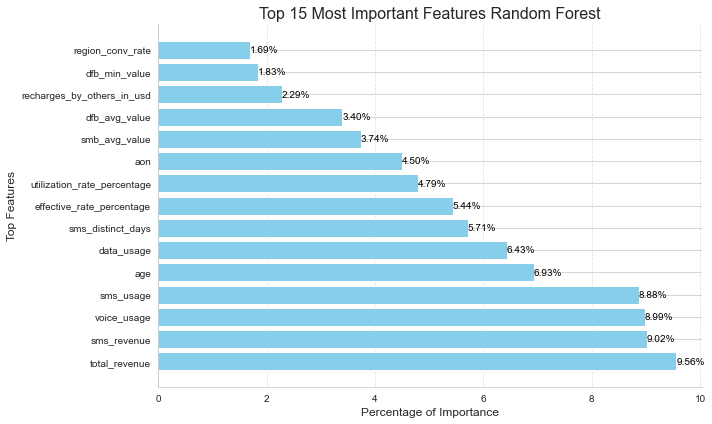

In [63]:
import matplotlib.pyplot as plt

# The code for calculating the top features and percentages remains the same as in your original code

# Create a bar plot for the top features and their percentages
plt.figure(figsize=(10, 6))
plt.barh(top_n_features, top_n_percentages, color='skyblue')  # Customizing the color
plt.xlabel('Percentage of Importance', fontsize=12)
plt.ylabel('Top Features', fontsize=12)
plt.title('Top 15 Most Important Features Random Forest', fontsize=16)

# Customizing grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding data labels to the right of the bars
for index, value in enumerate(top_n_percentages):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10, color='black')

# Customize the ticks and their labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Invert the y-axis to display the most important feature at the top
plt.gca().invert_yaxis()

# Adding a horizontal line for better separation
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()


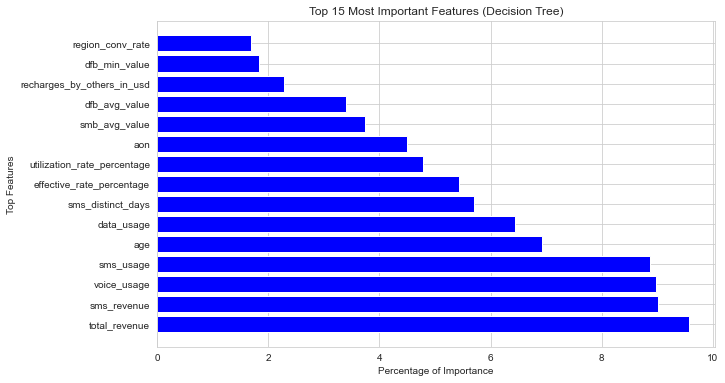

In [64]:
import matplotlib.pyplot as plt

# The code for calculating the top features and percentages remains the same as in your original code

# Create a bar plot for the top features and their percentages
plt.figure(figsize=(10, 6))
plt.barh(top_n_features, top_n_percentages, color='blue')
plt.xlabel('Percentage of Importance')
plt.ylabel('Top Features')
plt.title('Top 15 Most Important Features (Decision Tree)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top

# Display the plot
plt.show()


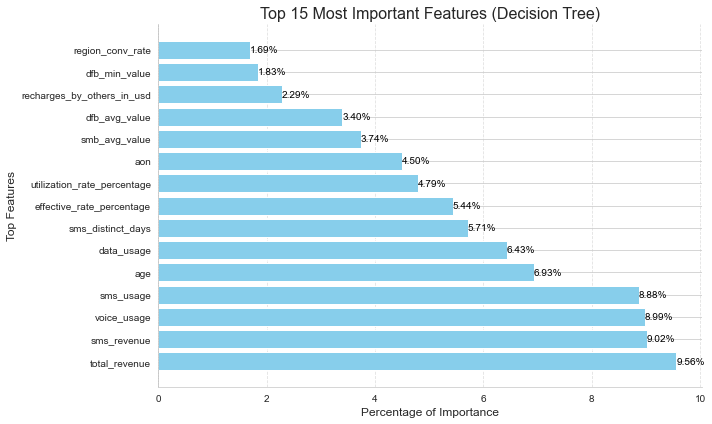

In [65]:
import matplotlib.pyplot as plt

# The code for calculating the top features and percentages remains the same as in your original code

# Create a bar plot for the top features and their percentages
plt.figure(figsize=(10, 6))
plt.barh(top_n_features, top_n_percentages, color='skyblue')  # Customizing the color
plt.xlabel('Percentage of Importance', fontsize=12)
plt.ylabel('Top Features', fontsize=12)
plt.title('Top 15 Most Important Features (Decision Tree)', fontsize=16)

# Customizing grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding data labels to the right of the bars
for index, value in enumerate(top_n_percentages):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10, color='black')

# Customize the ticks and their labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Invert the y-axis to display the most important feature at the top
plt.gca().invert_yaxis()

# Adding a horizontal line for better separation
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()


In [66]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion="gini", max_features=15, random_state=1)

# Fit the model
dt_classifier.fit(X_train, y_train)

dtc_pred = dt_classifier.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, dtc_pred)))

# Get feature importances
importances = dt_classifier.feature_importances_

# Calculate the sum of feature importances
total_importance = np.sum(importances)

# Get the indices of the top 10 most important features
top_10_indices = np.argsort(importances)[-15:]

# Get the names and percentages of the top 10 most important features
top_10_features = X.columns[top_10_indices]
top_10_percentages = (importances[top_10_indices] / total_importance) * 100

# Print the top 10 most important features with their percentages
print("Top 15 Most Important Features (Decision Tree):")
for feature, percentage in zip(top_10_features, top_10_percentages):
    print(f"{feature}: {percentage:.2f}%")


Model accuracy score with 10 decision-trees : 0.6728
Top 15 Most Important Features (Decision Tree):
region_conv_rate: 1.71%
recharges_by_others_in_usd: 2.17%
dfb_avg_value: 2.74%
smb_avg_value: 2.96%
aon: 4.38%
dfb_min_value: 4.38%
utilization_rate_percentage: 4.70%
sms_distinct_days: 5.03%
effective_rate_percentage: 5.43%
data_usage: 6.50%
age: 6.88%
sms_usage: 7.75%
voice_usage: 9.21%
total_revenue: 9.89%
sms_revenue: 10.05%


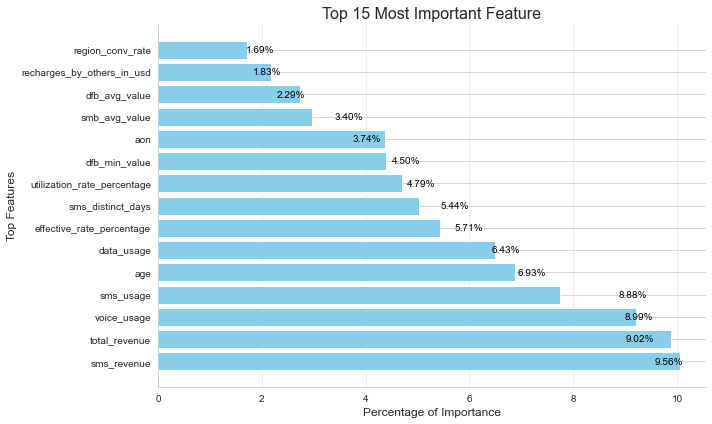

In [67]:
import matplotlib.pyplot as plt

# The code for calculating the top features and percentages remains the same as in your original code

# Create a bar plot for the top features and their percentages
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_percentages, color='skyblue')  # Customizing the color
plt.xlabel('Percentage of Importance', fontsize=12)
plt.ylabel('Top Features', fontsize=12)
plt.title('Top 15 Most Important Feature', fontsize=16)

# Customizing grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding data labels to the right of the bars
for index, value in enumerate(top_n_percentages):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10, color='black')

# Customize the ticks and their labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Invert the y-axis to display the most important feature at the top
plt.gca().invert_yaxis()

# Adding a horizontal line for better separation
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100,
                                           learning_rate=0.1,
                                           max_features=15,
                                           random_state=1)

# Fit the model
gb_classifier.fit(X_train, y_train)

gb_pred = gb_classifier.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, gb_pred)))

# Get feature importances
importances = gb_classifier.feature_importances_

# Calculate the sum of feature importances
total_importance = np.sum(importances)

# Get the indices of the top 10 most important features
top_10_indices = np.argsort(importances)[-15:]

# Get the names and percentages of the top 10 most important features
top_10_features = X.columns[top_10_indices]
top_10_percentages = (importances[top_10_indices] / total_importance) * 100

# Print the top 10 most important features with their percentages
print("Top 15 Most Important Features (Gradient Boosting):")
for feature, percentage in zip(top_10_features, top_10_percentages):
    print(f"{feature}: {percentage:.2f}%")


Model accuracy score with 10 decision-trees : 0.7740
Top 15 Most Important Features (Gradient Boosting):
recharges_by_others_in_usd: 1.07%
data_usage: 1.44%
age: 1.53%
effective_rate_percentage: 1.96%
sms_5_cust: 2.22%
sms_10_cust: 2.35%
utilization_rate_percentage: 2.68%
dfb_avg_value: 4.07%
smb_min_value: 4.52%
smb_avg_value: 4.89%
total_revenue: 8.29%
dfb_min_value: 12.91%
sms_distinct_days: 13.22%
sms_revenue: 16.81%
sms_usage: 17.88%


In [69]:
from xgboost import XGBClassifier
import numpy as np

# Create an XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100,
                               learning_rate=0.1,
                               max_depth=3,
                               random_state=1)

# Fit the model
xgb_classifier.fit(X_train, y_train)

xgb_pred = xgb_classifier.predict(X_test)
print('Model accuracy score with XGBoost: {0:0.4f}'.format(accuracy_score(y_test, xgb_pred)))

# Get feature importances
importances = xgb_classifier.feature_importances_

# Calculate the sum of feature importances
total_importance = np.sum(importances)

# Get the indices of the top 15 most important features
top_15_indices = np.argsort(importances)[-15:]

# Get the names and percentages of the top 15 most important features
top_15_features = X.columns[top_15_indices]
top_15_percentages = (importances[top_15_indices] / total_importance) * 100

# Print the top 15 most important features with their percentages
print("Top 15 Most Important Features (XGBoost):")
for feature, percentage in zip(top_15_features, top_15_percentages):
    print(f"{feature}: {percentage:.2f}%")


Model accuracy score with XGBoost: 0.7744
Top 15 Most Important Features (XGBoost):
age: 1.12%
sms_25_cust: 1.31%
recharges_by_others_in_usd: 1.33%
aon: 1.54%
data_usage: 1.86%
utilization_rate_percentage: 2.26%
sms_5_cust: 2.39%
sms_10_cust: 2.76%
total_revenue: 3.07%
effective_rate_percentage: 3.95%
smb_avg_value: 5.16%
sms_revenue: 6.44%
sms_usage: 14.27%
sms_distinct_days: 16.29%
smb_min_value: 28.76%


'age',
'sms_25_cust',
'recharges_by_others_in_usd',
'aon',
'data_usage',
'utilization_rate_percentage',
'sms_5_cust',
'sms_10_cust',
'total_revenue',
'effective_rate_percentage',
'smb_avg_value',
'sms_revenue',
'sms_usage',
'sms_distinct_days',
'smb_min_value',

In [70]:
X_train.columns

MultiIndex([(                 'sms_5_cust',),
            (                'sms_10_cust',),
            (                'sms_25_cust',),
            (               'sms_125_cust',),
            (               'sms_200_cust',),
            (               'sms_300_cust',),
            (          'sms_distinct_days',),
            (                 'data_usage',),
            (                'voice_usage',),
            (                  'sms_usage',),
            (                'sms_revenue',),
            (              'total_revenue',),
            (                        'age',),
            (                        'aon',),
            (              'smb_min_value',),
            (              'smb_max_value',),
            (              'smb_avg_value',),
            (              'dfb_min_value',),
            (              'dfb_max_value',),
            (              'dfb_avg_value',),
            ('utilization_rate_percentage',),
            (  'effective_rate_per

In [71]:
## Drop multiple columns in one attempt
#columns_to_drop = ['region_1','region_6','device_type_2','region_5','sms_5_cust','region_8','device_type_1','region_3',
#                  'sms_10_cust','overall_cust_segment_1','sms_125_cust','region_4','sms_25_cust','region_9','sms_200_cust',
#                  'dual_sim_3','device_type_3','overall_cust_segment_3','device_type_4','device_type_5','sms_300_cust',
#                   'overall_cust_segment_4', 'device_type_10','device_type_7','device_type_9','device_type_8','device_type_12',
#                   'device_type_13','device_type_11','device_type_6','device_type_14']
#X_train=X_train.drop(columns=columns_to_drop,axis=1)
#
#X_test=X_test.drop(columns=columns_to_drop,axis=1 )


In [72]:
# List of columns to keep
columns_to_keep = [
   'age',
'sms_25_cust',
'recharges_by_others_in_usd',
'aon',
'data_usage',
'utilization_rate_percentage',
'sms_5_cust',
'sms_10_cust',
'total_revenue',
'effective_rate_percentage',
'smb_avg_value',
'sms_revenue',
'sms_usage',
'sms_distinct_days',
'smb_min_value'
]

# Drop columns not in the list
X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]

# Now, 'df' contains only the columns you specified in 'columns_to_keep'


In [73]:
X_train.head()

,age,sms_25_cust,recharges_by_others_in_usd,aon,data_usage,utilization_rate_percentage,sms_5_cust,sms_10_cust,total_revenue,effective_rate_percentage,smb_avg_value,sms_revenue,sms_usage,sms_distinct_days,smb_min_value
0,0.167,0.000,1.821,0.875,1.348,-1.034,-1.000,1.000,0.274,-0.942,0.000,-0.223,-0.165,0.077,0.000
1,-0.222,0.000,1.821,-0.250,-0.021,-0.172,0.000,1.000,-0.183,-0.110,-0.667,1.089,0.904,1.077,-1.000
2,-1.056,1.000,1.964,-0.750,1.600,0.287,0.000,1.000,0.285,0.339,-0.800,0.701,1.991,0.308,-1.000
3,-0.500,0.000,1.821,0.000,0.561,0.690,-1.000,1.000,-0.401,0.725,0.000,-0.315,-0.261,-0.538,0.000
4,1.611,0.000,1.821,0.875,11.335,-0.952,-1.000,0.000,4.348,-0.863,0.000,1.518,2.157,1.077,0.000


In [74]:
print(X_train.shape,X_test.shape)

(331858, 15) (142226, 15)


In [75]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a RandomForestClassifier
rfcv1 = RandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_features=15,
                               n_jobs=-1,
                               random_state=1)

# Fit the model
rfcv1.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
rfc_pred = rfcv1.predict(X_test)
print('Model accuracy score with RF : {0:0.4f}'. format(accuracy_score(y_test, rfc_pred)))


Model accuracy score with RF : 0.7694


In [76]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create a DecisionTreeClassifier with all features
dt_classifier = DecisionTreeClassifier(criterion="gini", max_features=None, random_state=1)

# Fit the model
dt_classifier.fit(X_train, y_train)

dtc_pred = dt_classifier.predict(X_test)
print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(y_test, dtc_pred)))


Model accuracy score with decision-trees : 0.6702


In [77]:
# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100,
                                           learning_rate=0.1,
                                           max_features=None,
                                           random_state=1)

# Fit the model
gb_classifier.fit(X_train, y_train)

gb_pred = gb_classifier.predict(X_test)
print('Model accuracy score with GB : {0:0.4f}'. format(accuracy_score(y_test, gb_pred)))

Model accuracy score with GB : 0.7739


In [78]:
# Create an XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100,
                               learning_rate=0.1,
                               max_depth=3,
                               random_state=1)

# Fit the model
xgb_classifier.fit(X_train, y_train)

xgb_pred = xgb_classifier.predict(X_test)
print('Model accuracy score with XGBoost: {0:0.4f}'.format(accuracy_score(y_test, xgb_pred)))

Model accuracy score with XGBoost: 0.7726


In [79]:
#from sklearn.svm import SVC
#import numpy as np
#
## Create an SVM classifier
#svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=1)
#
## Fit the model
#svm_classifier.fit(X_train, y_train)
#
## Predict using the SVM classifier
#svm_pred = svm_classifier.predict(X_test)
#
## Calculate accuracy
#from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(y_test, svm_pred)
#
#print('Model accuracy score with SVM : {0:0.4f}'.format(accuracy))
#

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87    109583
           1       0.49      0.12      0.19     32643

    accuracy                           0.77    142226
   macro avg       0.64      0.54      0.53    142226
weighted avg       0.72      0.77      0.71    142226



In [81]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78    109583
           1       0.29      0.31      0.30     32643

    accuracy                           0.67    142226
   macro avg       0.54      0.54      0.54    142226
weighted avg       0.68      0.67      0.67    142226



In [82]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87    109583
           1       0.54      0.11      0.18     32643

    accuracy                           0.77    142226
   macro avg       0.66      0.54      0.52    142226
weighted avg       0.73      0.77      0.71    142226



In [83]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87    109583
           1       0.52      0.12      0.19     32643

    accuracy                           0.77    142226
   macro avg       0.65      0.54      0.53    142226
weighted avg       0.73      0.77      0.71    142226



In [84]:
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
xgb_pred.shape

(142226,)

In [86]:
my_dataframe = pd.DataFrame(xgb_pred)

In [87]:
my_dataframe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [88]:
#this is actual migration count
y_test.value_counts()

0    109583
1     32643
Name: flag_final, dtype: int64

In [89]:
#random forest predict for migration
my_dataframe.value_counts()

0    134692
1      7534
dtype: int64

In [90]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn import tree

import pickle
from hyperopt import hp, tpe, fmin,STATUS_OK,Trials

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score

## Model Creation

We have created a dataframe which consists of our target variable as well as the independent variables.

Some models which we will use are: 
* Decision Tree
* Random Forest 
* Gradient Boosting
* XGBoost

We will select the model with best recall.

### Decision Tree

In [91]:
cm_rfc = confusion_matrix(y_test, rfc_pred)

print('Confusion matrix\n\n', cm_rfc)

Confusion matrix

 [[105466   4117]
 [ 28681   3962]]


In [92]:
cm_dtc = confusion_matrix(y_test, dtc_pred)

print('Confusion matrix\n\n', cm_dtc)

Confusion matrix

 [[85147 24436]
 [22464 10179]]


In [93]:
cm_gb = confusion_matrix(y_test, gb_pred)

print('Confusion matrix\n\n', cm_gb)

Confusion matrix

 [[106575   3008]
 [ 29153   3490]]


In [94]:
cm_xgb = confusion_matrix(y_test, xgb_pred)

print('Confusion matrix\n\n', cm_xgb)

Confusion matrix

 [[105965   3618]
 [ 28727   3916]]


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Calculate metrics for each model
accuracy_rfc, precision_rfc, recall_rfc, f1_rfc = evaluate_model(y_test, rfc_pred)
accuracy_dtc, precision_dtc, recall_dtc, f1_dtc = evaluate_model(y_test, dtc_pred)
accuracy_gb, precision_gb, recall_gb, f1_gb = evaluate_model(y_test, gb_pred)
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = evaluate_model(y_test, xgb_pred)

# Display the evaluation metrics
print("Random Forest:")
print(f"Accuracy: {accuracy_rfc:.4f}, Precision: {precision_rfc:.4f}, Recall: {recall_rfc:.4f}, F1-score: {f1_rfc:.4f}\n")

print("Decision Tree:")
print(f"Accuracy: {accuracy_dtc:.4f}, Precision: {precision_dtc:.4f}, Recall: {recall_dtc:.4f}, F1-score: {f1_dtc:.4f}\n")

print("Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.4f}, Precision: {precision_gb:.4f}, Recall: {recall_gb:.4f}, F1-score: {f1_gb:.4f}\n")

print("XGBoost:")
print(f"Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-score: {f1_xgb:.4f}\n")


Random Forest:
Accuracy: 0.7694, Precision: 0.4904, Recall: 0.1214, F1-score: 0.1946

Decision Tree:
Accuracy: 0.6702, Precision: 0.2941, Recall: 0.3118, F1-score: 0.3027

Gradient Boosting:
Accuracy: 0.7739, Precision: 0.5371, Recall: 0.1069, F1-score: 0.1783

XGBoost:
Accuracy: 0.7726, Precision: 0.5198, Recall: 0.1200, F1-score: 0.1949



In [96]:
rf_predictions
rf_predictions
array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
rf_predictions_v1=pd.DataFrame(rf_predictions)
rf_predictions_v1.value_counts()
0    434840
1     21210
dtype: int64

SyntaxError: invalid syntax (3352097688.py, line 6)

    If you prioritize precision (minimizing false positives), choose the model with the highest precision.
    If you prioritize recall (minimizing false negatives), choose the model with the highest recall.
    If you want a balance between precision and recall, consider the F1-score, which combines both metrics.
        Accuracy measures the overall correctness of the model's predictions. Based on accuracy alone, Gradient Boosting and XGBoost have the highest accuracy, indicating that they correctly classify a relatively large proportion of instances.

    Precision measures the ability of the model to make accurate positive predictions (true positives). A higher precision indicates that the model is better at avoiding false positives. In this case, Gradient Boosting has the highest precision.

    Recall measures the ability of the model to correctly identify positive instances (true positives) out of all actual positive instances. A higher recall indicates that the model is better at capturing positive cases. However, it comes at the cost of potentially higher false negatives.

    F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1-score indicates a better balance between the two metrics.

Considering the F1-score, which balances precision and recall, and given that you haven't specified a preference for precision or recall, the XGBoost model has the highest F1-score (0.1949). This suggests that, among the models evaluated, XGBoost performs the best overall in terms of balancing precision and recall.

# model evaluation

In [97]:
def model_evaluation(model):
      
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(10, 8))
    plt.title(f"Confusion Matrix for {model}", fontsize=18, fontweight='bold')
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='plasma')
    plt.show()
    
    
    

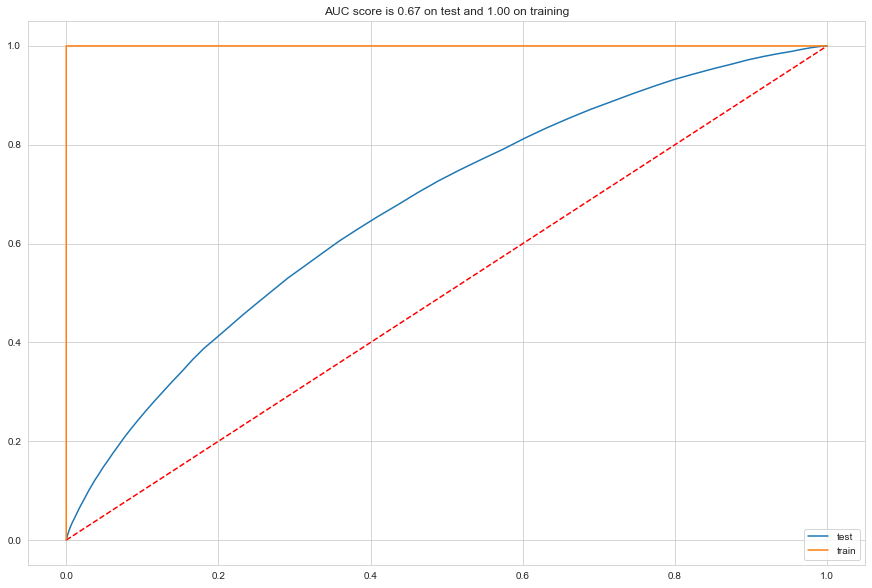

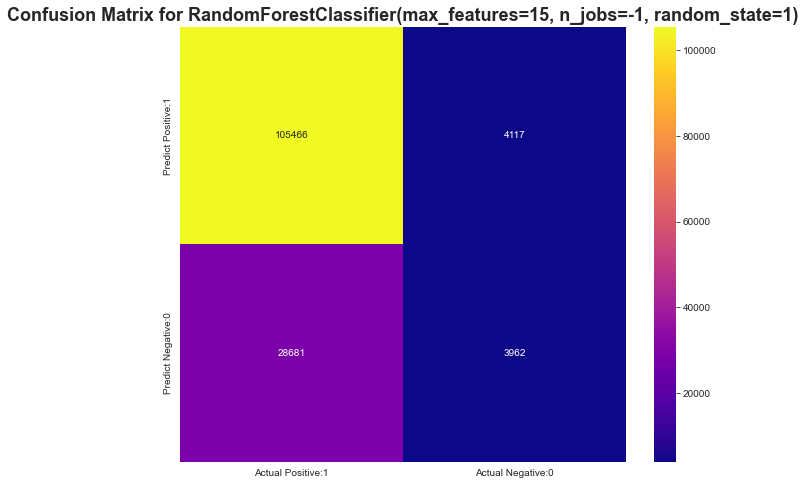

In [98]:
model_evaluation(rfcv1)

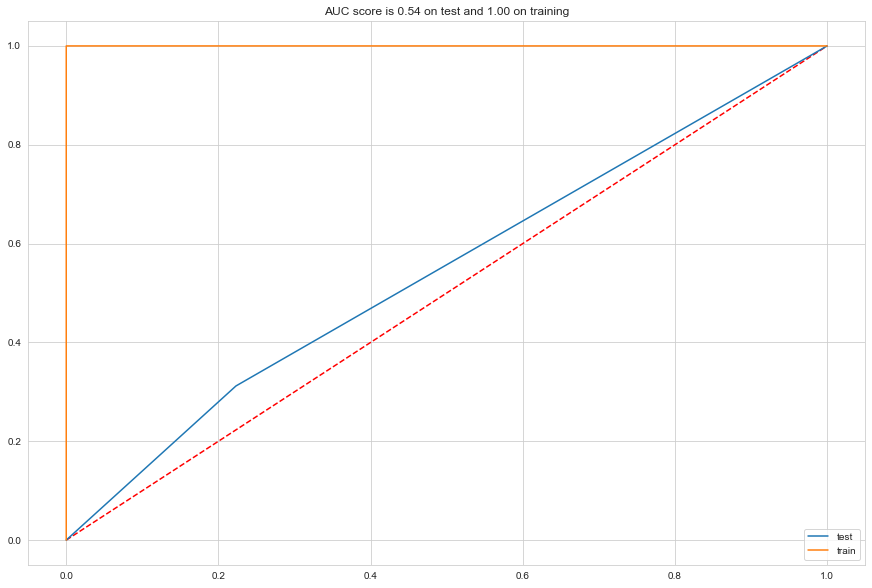

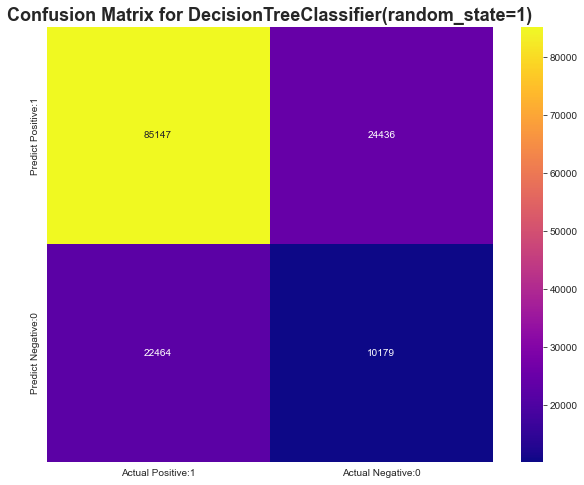

In [99]:
model_evaluation(dt_classifier)

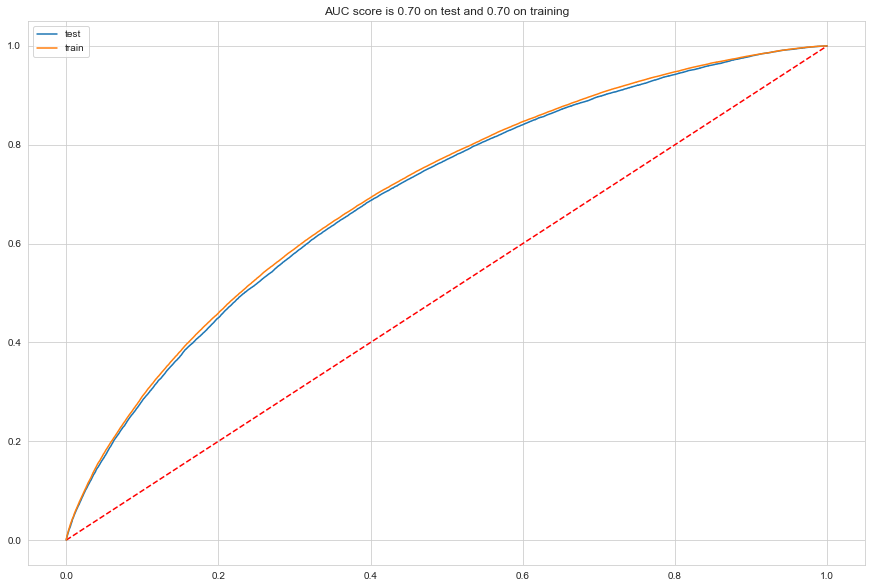

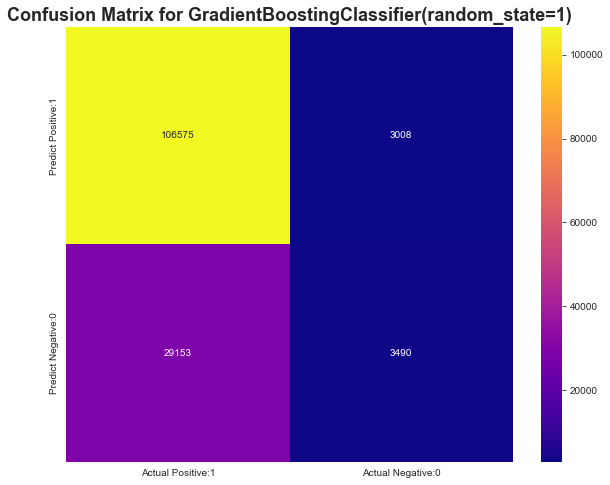

In [100]:
model_evaluation(gb_classifier)

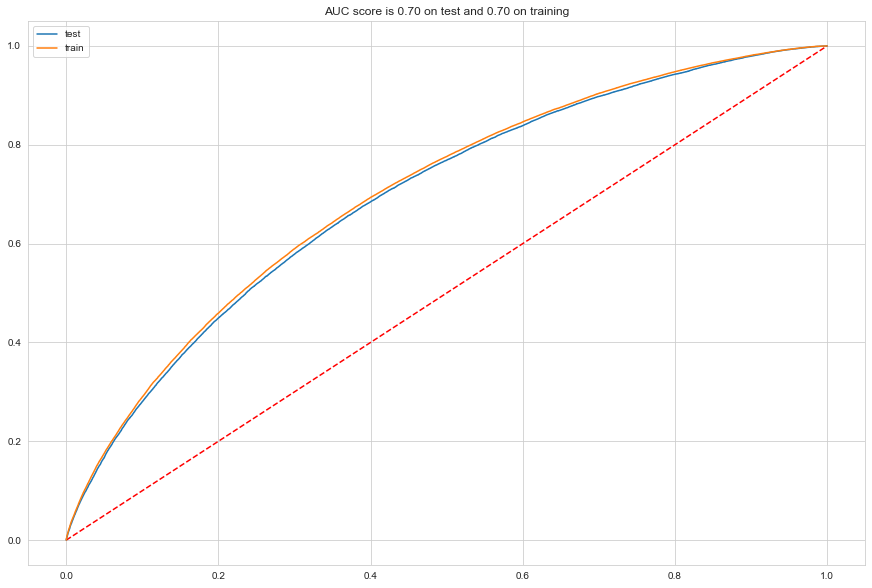

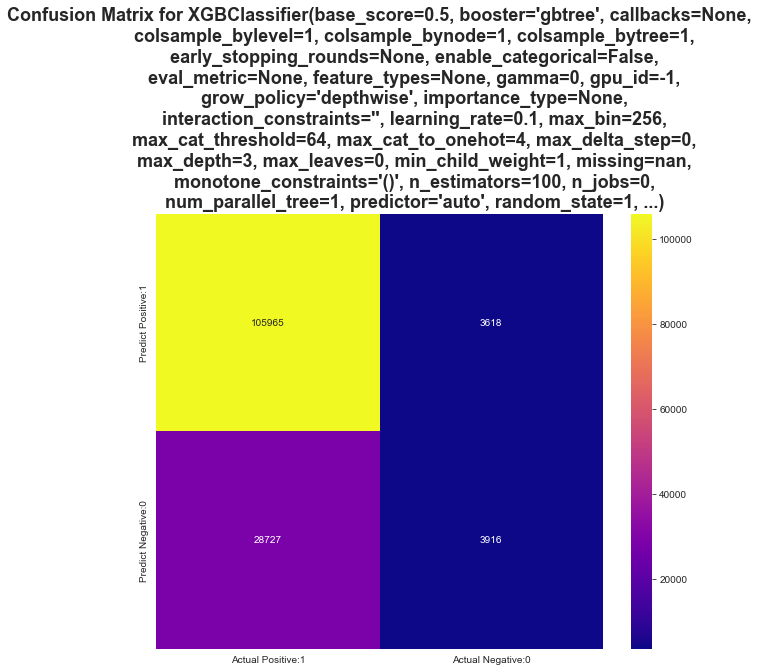

In [101]:
model_evaluation(xgb_classifier)

In [102]:
def model_compare(model):      
    return accuracy_score(y_test, model.predict(X_test)), recall_score(y_test, model.predict(X_test)), precision_score(y_test, model.predict(X_test)), f1_score(y_test, model.predict(X_test))

In [103]:
model_names = ['Decision Tree','Gradient Boost', 'XGBoost','Random forest']
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


In [104]:
# Decision Tree
accuracy_score_dtree, recall_score_dtree, precision_score_dtree, f1_score_dtree = model_compare(dt_classifier)

accuracy_scores.append(accuracy_score_dtree)
recall_scores.append(recall_score_dtree)
precision_scores.append(precision_score_dtree)
f1_scores.append(f1_score_dtree)

In [105]:
# Gradient Boosting
accuracy_score_gb, recall_score_gb, precision_score_gb, f1_score_gb = model_compare(gb_classifier)

accuracy_scores.append(accuracy_score_gb)
recall_scores.append(recall_score_gb)
precision_scores.append(precision_score_gb)
f1_scores.append(f1_score_gb)

In [106]:
# XG Boost
accuracy_score_xgb, recall_score_xgb, precision_score_xgb, f1_score_xgb = model_compare(xgb_classifier)

accuracy_scores.append(accuracy_score_xgb)
recall_scores.append(recall_score_xgb)
precision_scores.append(precision_score_xgb)
f1_scores.append(f1_score_xgb)

In [107]:
# Random Forest
accuracy_score_rf, recall_score_rf, precision_score_rf, f1_score_rf = model_compare(rfcv1)

accuracy_scores.append(accuracy_score_rf)
recall_scores.append(recall_score_rf)
precision_scores.append(precision_score_rf)
f1_scores.append(f1_score_rf)

In [108]:
model_comparison = pd.DataFrame(data=[accuracy_scores, recall_scores, precision_scores, f1_scores],
                               columns= model_names,
                                index = ['Accuracy', 'Recall', 'Precision', 'F1']
                               )
model_comparison

,Decision Tree,Gradient Boost,XGBoost,Random forest
Accuracy,0.670,0.774,0.773,0.769
Recall,0.312,0.107,0.120,0.121
Precision,0.294,0.537,0.520,0.490
F1,0.303,0.178,0.195,0.195


In [109]:
# performing p test

##################### test data for aug month ############################

## predicting on aug data 

In [110]:
df_test_aug_old = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\20231013_tmp_sms_rf_model_final_spt_base.csv', low_memory=False)
df_test_aug_old.head()

,msisdn,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
0,263771000457,0,0,0,1,0,0,0,Harare South,9,LVC,0.592,143.250,25,485.343,29969.672,Female,Smartphone,N,48.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
1,263771000681,1,0,0,0,0,0,0,Harare North,5,LVC,0.000,91.583,13,909.872,15001.024,Male,Mobile Phone/Feature phone,Y,54.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,263771001005,0,0,1,0,0,0,0,Unmapped,30,HVC,2.718,312.433,662,32471.186,185490.216,Male,Smartphone,Y,43.000,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
3,263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,11,LVC,0.000,0.283,236,4155.914,4182.663,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1.000,99999.000,5264.105,1.000,99999.000,5264.105,185.000,0.894,NaN,20
4,263771001109,1,0,0,0,0,0,0,Mashonaland C + W,4,LVC,0.000,42.950,23,2153.996,13794.863,Male,Unmapped,Unmapped,27.000,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [111]:
df_test_aug_test = df_test_aug_old

In [112]:
df_test_aug_test_v1 = df_test_aug_test

In [113]:
df_test_aug_test.head()

,msisdn,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
0,263771000457,0,0,0,1,0,0,0,Harare South,9,LVC,0.592,143.250,25,485.343,29969.672,Female,Smartphone,N,48.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
1,263771000681,1,0,0,0,0,0,0,Harare North,5,LVC,0.000,91.583,13,909.872,15001.024,Male,Mobile Phone/Feature phone,Y,54.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,263771001005,0,0,1,0,0,0,0,Unmapped,30,HVC,2.718,312.433,662,32471.186,185490.216,Male,Smartphone,Y,43.000,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
3,263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,11,LVC,0.000,0.283,236,4155.914,4182.663,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1.000,99999.000,5264.105,1.000,99999.000,5264.105,185.000,0.894,NaN,20
4,263771001109,1,0,0,0,0,0,0,Mashonaland C + W,4,LVC,0.000,42.950,23,2153.996,13794.863,Male,Unmapped,Unmapped,27.000,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [114]:
df_test_aug_test_v1.head()

,msisdn,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
0,263771000457,0,0,0,1,0,0,0,Harare South,9,LVC,0.592,143.250,25,485.343,29969.672,Female,Smartphone,N,48.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
1,263771000681,1,0,0,0,0,0,0,Harare North,5,LVC,0.000,91.583,13,909.872,15001.024,Male,Mobile Phone/Feature phone,Y,54.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,263771001005,0,0,1,0,0,0,0,Unmapped,30,HVC,2.718,312.433,662,32471.186,185490.216,Male,Smartphone,Y,43.000,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
3,263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,11,LVC,0.000,0.283,236,4155.914,4182.663,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1.000,99999.000,5264.105,1.000,99999.000,5264.105,185.000,0.894,NaN,20
4,263771001109,1,0,0,0,0,0,0,Mashonaland C + W,4,LVC,0.000,42.950,23,2153.996,13794.863,Male,Unmapped,Unmapped,27.000,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [115]:
df_test_aug_old.set_index('msisdn', inplace=True)
df_test_aug_old.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,Harare South,9,LVC,0.592,143.250,25,485.343,29969.672,Female,Smartphone,N,48.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
263771000681,1,0,0,0,0,0,0,Harare North,5,LVC,0.000,91.583,13,909.872,15001.024,Male,Mobile Phone/Feature phone,Y,54.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
263771001005,0,0,1,0,0,0,0,Unmapped,30,HVC,2.718,312.433,662,32471.186,185490.216,Male,Smartphone,Y,43.000,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,11,LVC,0.000,0.283,236,4155.914,4182.663,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1.000,99999.000,5264.105,1.000,99999.000,5264.105,185.000,0.894,NaN,20
263771001109,1,0,0,0,0,0,0,Mashonaland C + W,4,LVC,0.000,42.950,23,2153.996,13794.863,Male,Unmapped,Unmapped,27.000,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [116]:
%%time
df_test_aug = df_test_aug_old[(df_test_aug_old['age'] > 0) & (df_test_aug_old['age'] <= 99) & (df_test_aug_old['aon'] <= 15) & (df_test_aug_old['gender'] != "Unknown")]


CPU times: total: 203 ms
Wall time: 206 ms


In [117]:
df_test_aug.isnull().sum()

sms_5_cust                          0
sms_10_cust                         0
sms_25_cust                         0
sms_125_cust                        0
sms_200_cust                        0
sms_300_cust                        0
flag_final                          0
region                              0
sms_distinct_days                   0
overall_cust_segment                0
data_usage                          0
voice_usage                         0
sms_usage                           0
sms_revenue                         0
total_revenue                       0
gender                              0
device_type                         0
dual_sim                            0
age                                 0
aon                                 0
smb_min_value                  220466
smb_max_value                  220466
smb_avg_value                  220466
dfb_min_value                  220466
dfb_max_value                  220466
dfb_avg_value                  220466
utilization_

In [118]:
df_test_aug['age'] = df_test_aug['age'].astype(int)
df_test_aug['aon'] = df_test_aug['aon'].astype(int)

In [119]:
import pandas as pd

# Assuming you have a DataFrame named df_test_aug

# List of columns to fill with their respective means
columns_to_fill = [
    'smb_min_value',
    'smb_max_value',
    'smb_avg_value',
    'dfb_min_value',
    'dfb_max_value',
    'dfb_avg_value',
    'utilization_rate_percentage',
    'effective_rate_percentage',
    'recharges_by_others_in_usd'
]

# Fill NaN values in specified columns with their respective means
for column in columns_to_fill:
    df_test_aug[column].fillna(df_test_aug[column].mean(), inplace=True)


In [120]:
df_test_aug['dfb_min_value'] .head()

msisdn
263771000457   39962.562
263771000681   39962.562
263771001005   39962.562
263771001054       1.000
263771001109   39962.562
Name: dfb_min_value, dtype: float64

In [121]:
df_test_aug.isnull().sum()

sms_5_cust                     0
sms_10_cust                    0
sms_25_cust                    0
sms_125_cust                   0
sms_200_cust                   0
sms_300_cust                   0
flag_final                     0
region                         0
sms_distinct_days              0
overall_cust_segment           0
data_usage                     0
voice_usage                    0
sms_usage                      0
sms_revenue                    0
total_revenue                  0
gender                         0
device_type                    0
dual_sim                       0
age                            0
aon                            0
smb_min_value                  0
smb_max_value                  0
smb_avg_value                  0
dfb_min_value                  0
dfb_max_value                  0
dfb_avg_value                  0
utilization_rate_percentage    0
effective_rate_percentage      0
recharges_by_others_in_usd     0
region_conv_rate               0
dtype: int

In [122]:
new_target_var=df_test_aug.flag_final

In [123]:
new_target_var.head()

msisdn
263771000457    0
263771000681    0
263771001005    0
263771001054    1
263771001109    0
Name: flag_final, dtype: int64

In [124]:
df_test_aug.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,Harare South,9,LVC,0.592,143.250,25,485.343,29969.672,Female,Smartphone,N,48,11,39962.562,99999.000,61651.574,39962.562,99999.000,61651.574,61.887,3.085,1.065,19
263771000681,1,0,0,0,0,0,0,Harare North,5,LVC,0.000,91.583,13,909.872,15001.024,Male,Mobile Phone/Feature phone,Y,54,11,39962.562,99999.000,61651.574,39962.562,99999.000,61651.574,61.887,3.085,1.065,19
263771001005,0,0,1,0,0,0,0,Unmapped,30,HVC,2.718,312.433,662,32471.186,185490.216,Male,Smartphone,Y,43,10,39962.562,99999.000,61651.574,39962.562,99999.000,61651.574,61.887,3.085,1.065,24
263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,11,LVC,0.000,0.283,236,4155.914,4182.663,Female,Mobile Phone/Feature phone,Y,43,10,1.000,99999.000,5264.105,1.000,99999.000,5264.105,185.000,0.894,1.065,20
263771001109,1,0,0,0,0,0,0,Mashonaland C + W,4,LVC,0.000,42.950,23,2153.996,13794.863,Male,Unmapped,Unmapped,27,6,39962.562,99999.000,61651.574,39962.562,99999.000,61651.574,61.887,3.085,1.065,21


In [125]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['region', 'overall_cust_segment', 'gender', 'device_type', 'dual_sim'])

df_test_aug = encoder.fit_transform(df_test_aug)

In [126]:
df_test_aug.shape

(443373, 57)

In [127]:
# List of columns to keep
columns_to_keep = [
   'age',
'sms_25_cust',
'recharges_by_others_in_usd',
'aon',
'data_usage',
'utilization_rate_percentage',
'sms_5_cust',
'sms_10_cust',
'total_revenue',
'effective_rate_percentage',
'smb_avg_value',
'sms_revenue',
'sms_usage',
'sms_distinct_days',
'smb_min_value'
]

# Drop columns not in the list
#X_train = X_train[columns_to_keep]
#X_test = X_test[columns_to_keep]

# Now, 'df' contains only the columns you specified in 'columns_to_keep'
df_test_aug=df_test_aug[columns_to_keep]

In [128]:
df_test_aug.shape

(443373, 15)

In [129]:
cols = df_test_aug.columns

In [130]:
cols

Index(['age', 'sms_25_cust', 'recharges_by_others_in_usd', 'aon', 'data_usage', 'utilization_rate_percentage', 'sms_5_cust', 'sms_10_cust', 'total_revenue', 'effective_rate_percentage', 'smb_avg_value', 'sms_revenue', 'sms_usage', 'sms_distinct_days', 'smb_min_value'], dtype='object')

In [131]:
X_train.columns

MultiIndex([(                        'age',),
            (                'sms_25_cust',),
            ( 'recharges_by_others_in_usd',),
            (                        'aon',),
            (                 'data_usage',),
            ('utilization_rate_percentage',),
            (                 'sms_5_cust',),
            (                'sms_10_cust',),
            (              'total_revenue',),
            (  'effective_rate_percentage',),
            (              'smb_avg_value',),
            (                'sms_revenue',),
            (                  'sms_usage',),
            (          'sms_distinct_days',),
            (              'smb_min_value',)],
           )

In [132]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_test_aug = scaler.fit_transform(df_test_aug)

In [133]:
df_test_aug_v1=pd.DataFrame(df_test_aug,columns=[cols])
df_test_aug_v1.head()

,age,sms_25_cust,recharges_by_others_in_usd,aon,data_usage,utilization_rate_percentage,sms_5_cust,sms_10_cust,total_revenue,effective_rate_percentage,smb_avg_value,sms_revenue,sms_usage,sms_distinct_days,smb_min_value
0,0.611,0.000,0.000,0.556,1.519,0.000,-1.000,0.000,0.427,0.000,0.000,-0.204,-0.096,0.000,0.000
1,0.944,0.000,0.000,0.556,-0.044,0.000,0.000,0.000,-0.098,0.000,0.000,-0.112,-0.184,-0.267,0.000
2,0.333,1.000,0.000,0.444,7.131,0.000,-1.000,0.000,5.883,0.000,0.000,6.747,4.588,1.400,0.000
3,0.333,0.000,0.000,0.444,-0.044,123.113,0.000,0.000,-0.477,-42.150,-4.842,0.594,1.456,0.133,-1.000
4,-0.556,0.000,0.000,0.000,-0.044,0.000,0.000,0.000,-0.140,0.000,0.000,0.159,-0.110,-0.333,0.000


In [134]:
df_test_aug = pd.DataFrame(df_test_aug, columns=[cols])

In [135]:
new_target_var.head()

msisdn
263771000457    0
263771000681    0
263771001005    0
263771001054    1
263771001109    0
Name: flag_final, dtype: int64

In [136]:
df_test_aug.shape

(443373, 15)

In [137]:
df_test_aug.columns

MultiIndex([(                        'age',),
            (                'sms_25_cust',),
            ( 'recharges_by_others_in_usd',),
            (                        'aon',),
            (                 'data_usage',),
            ('utilization_rate_percentage',),
            (                 'sms_5_cust',),
            (                'sms_10_cust',),
            (              'total_revenue',),
            (  'effective_rate_percentage',),
            (              'smb_avg_value',),
            (                'sms_revenue',),
            (                  'sms_usage',),
            (          'sms_distinct_days',),
            (              'smb_min_value',)],
           )

In [138]:
X_train.columns

MultiIndex([(                        'age',),
            (                'sms_25_cust',),
            ( 'recharges_by_others_in_usd',),
            (                        'aon',),
            (                 'data_usage',),
            ('utilization_rate_percentage',),
            (                 'sms_5_cust',),
            (                'sms_10_cust',),
            (              'total_revenue',),
            (  'effective_rate_percentage',),
            (              'smb_avg_value',),
            (                'sms_revenue',),
            (                  'sms_usage',),
            (          'sms_distinct_days',),
            (              'smb_min_value',)],
           )

In [139]:
df_cols = [
    'age', 'sms_25_cust', 'recharges_by_others_in_usd', 'aon',
    'data_usage', 'utilization_rate_percentage', 'sms_5_cust', 'sms_10_cust', 'total_revenue', 'effective_rate_percentage',
    'smb_avg_value', 'sms_revenue', 'sms_usage', 'sms_distinct_days', 'smb_min_value'
]

# Select the specified columns from df_test_aug to create df_test_aug_v2
df_test_aug_v2 = df_test_aug[df_cols].copy()

df_test_aug_v2.head()


,age,sms_25_cust,recharges_by_others_in_usd,aon,data_usage,utilization_rate_percentage,sms_5_cust,sms_10_cust,total_revenue,effective_rate_percentage,smb_avg_value,sms_revenue,sms_usage,sms_distinct_days,smb_min_value
0,0.611,0.000,0.000,0.556,1.519,0.000,-1.000,0.000,0.427,0.000,0.000,-0.204,-0.096,0.000,0.000
1,0.944,0.000,0.000,0.556,-0.044,0.000,0.000,0.000,-0.098,0.000,0.000,-0.112,-0.184,-0.267,0.000
2,0.333,1.000,0.000,0.444,7.131,0.000,-1.000,0.000,5.883,0.000,0.000,6.747,4.588,1.400,0.000
3,0.333,0.000,0.000,0.444,-0.044,123.113,0.000,0.000,-0.477,-42.150,-4.842,0.594,1.456,0.133,-1.000
4,-0.556,0.000,0.000,0.000,-0.044,0.000,0.000,0.000,-0.140,0.000,0.000,0.159,-0.110,-0.333,0.000


In [140]:
def model_evaluation_new(model):
      
    fpr, tpr, _ = roc_curve(new_target_var, model.predict_proba(df_test_aug_v2)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.plot(fpr, tpr, label="test")

        
    auc_test = roc_auc_score(new_target_var, model.predict_proba(df_test_aug_v2)[:,1])
        
    plt.legend()
    plt.title('AUC score is %.2f on test'%(auc_test))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.title(f"Confusion Matrix for {model}", fontsize=18, fontweight='bold')
    cm = confusion_matrix(new_target_var, model.predict(df_test_aug_v2))
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='plasma')
    plt.show()

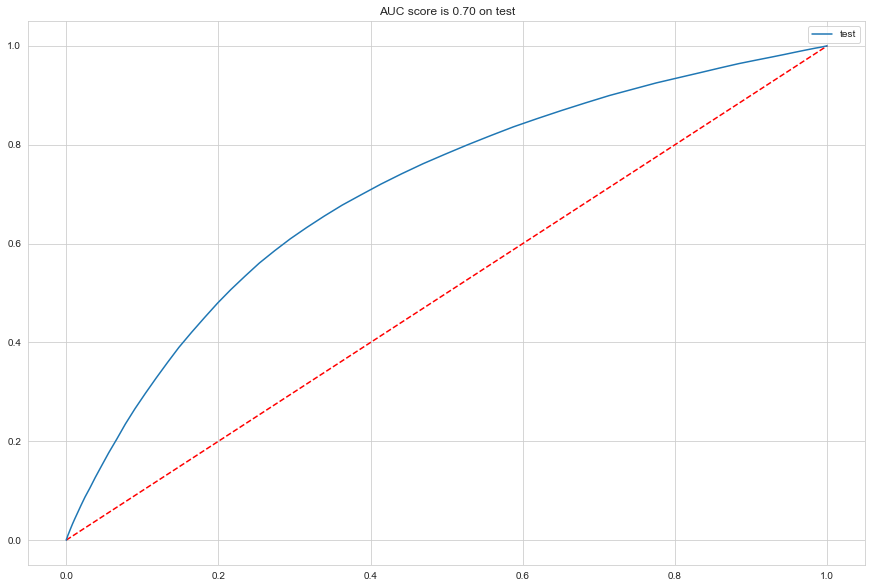

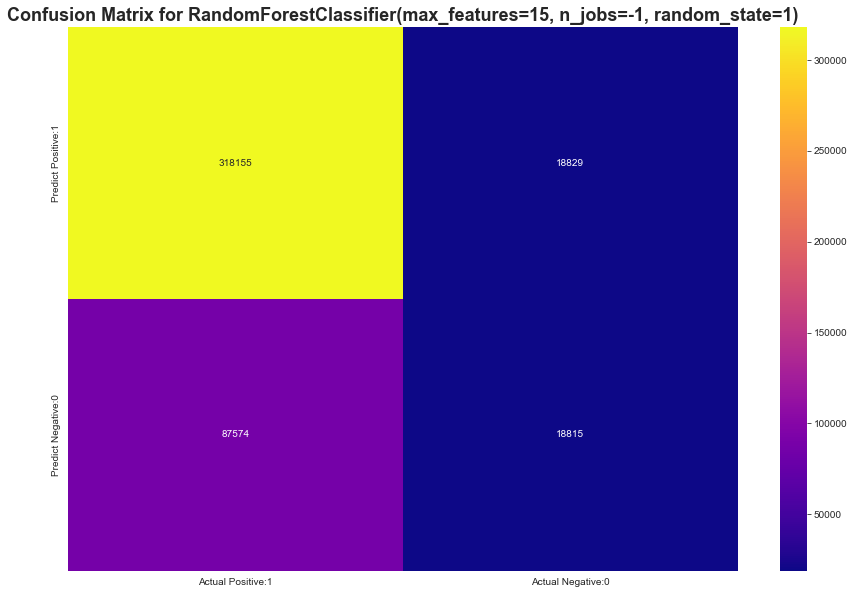

In [141]:
model_evaluation_new(rfcv1)

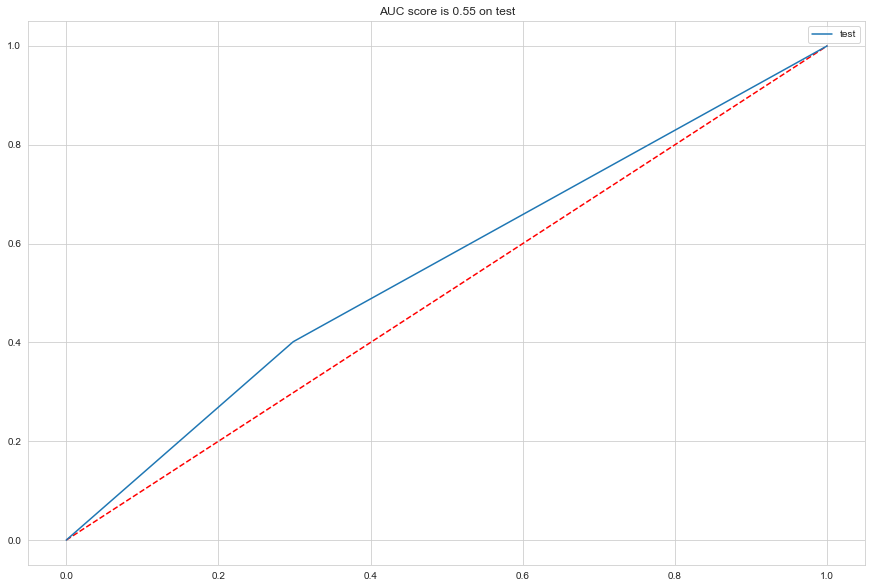

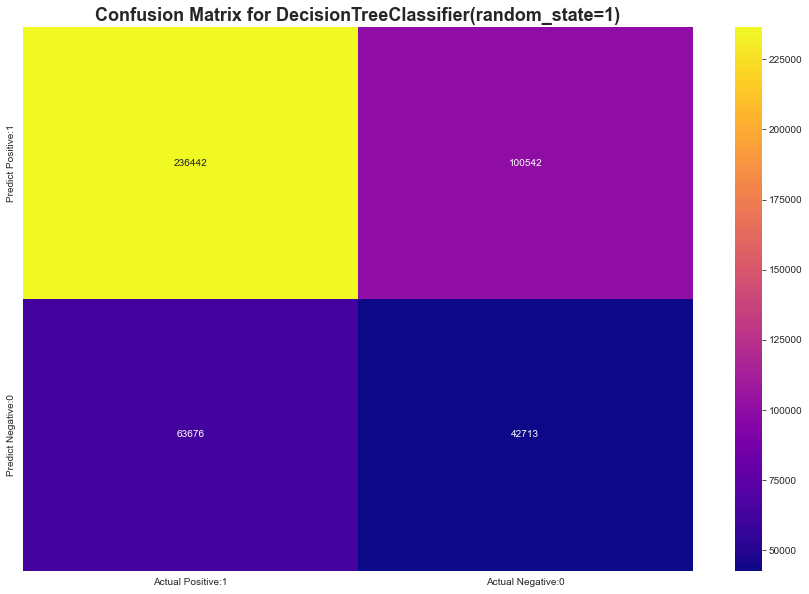

In [142]:
model_evaluation_new(dt_classifier)

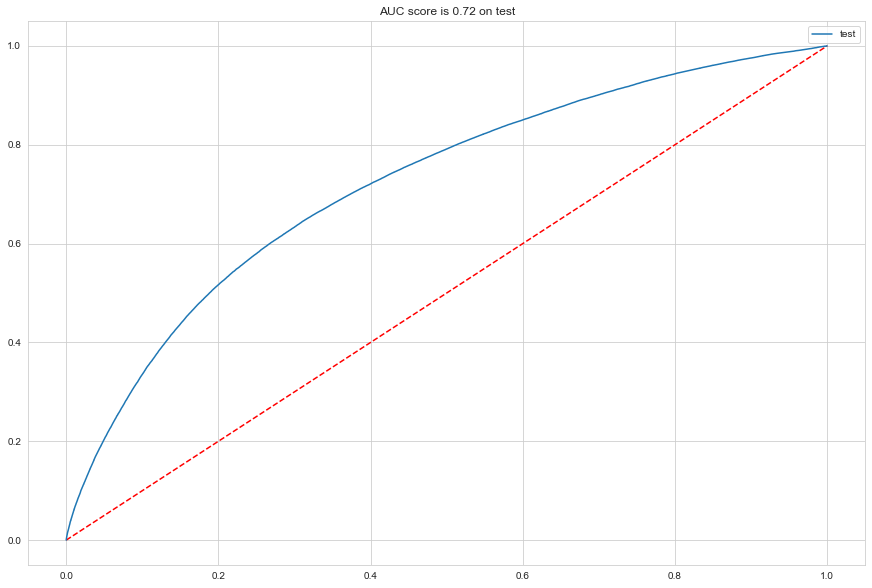

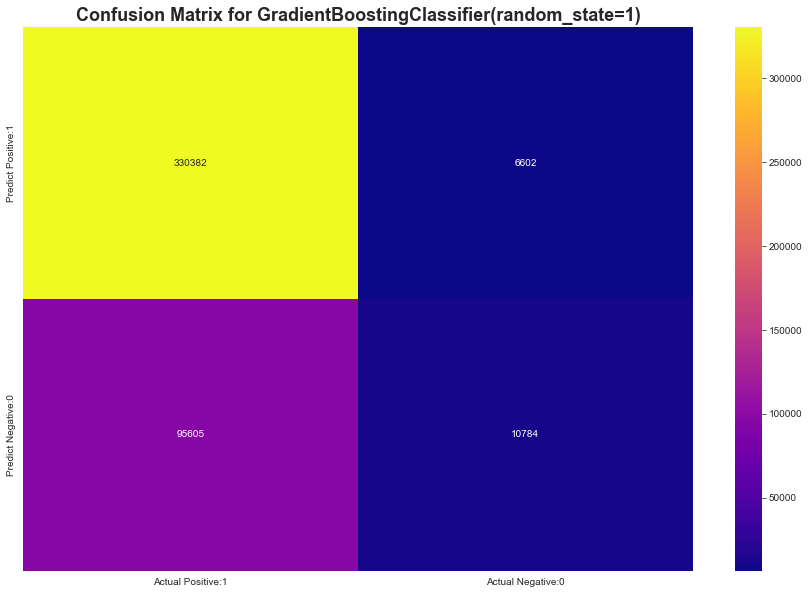

In [143]:
model_evaluation_new(gb_classifier)

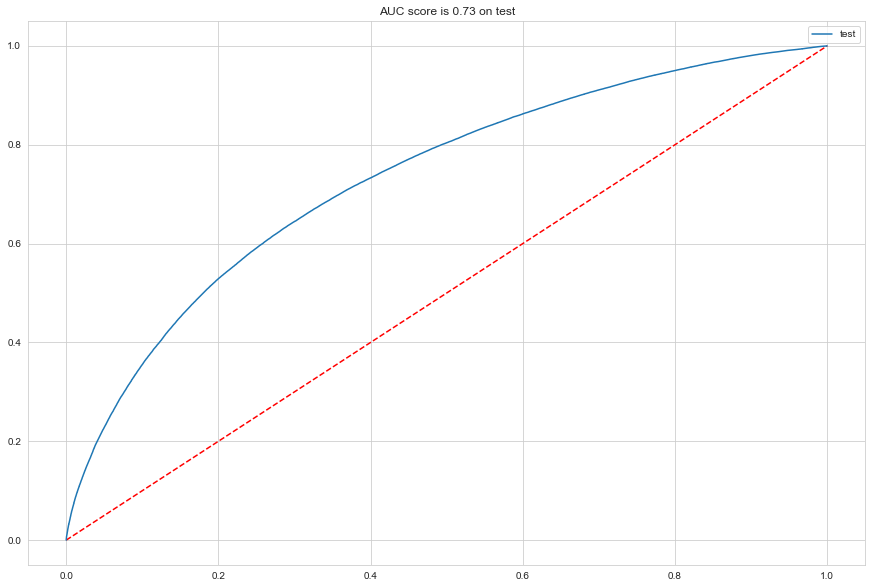

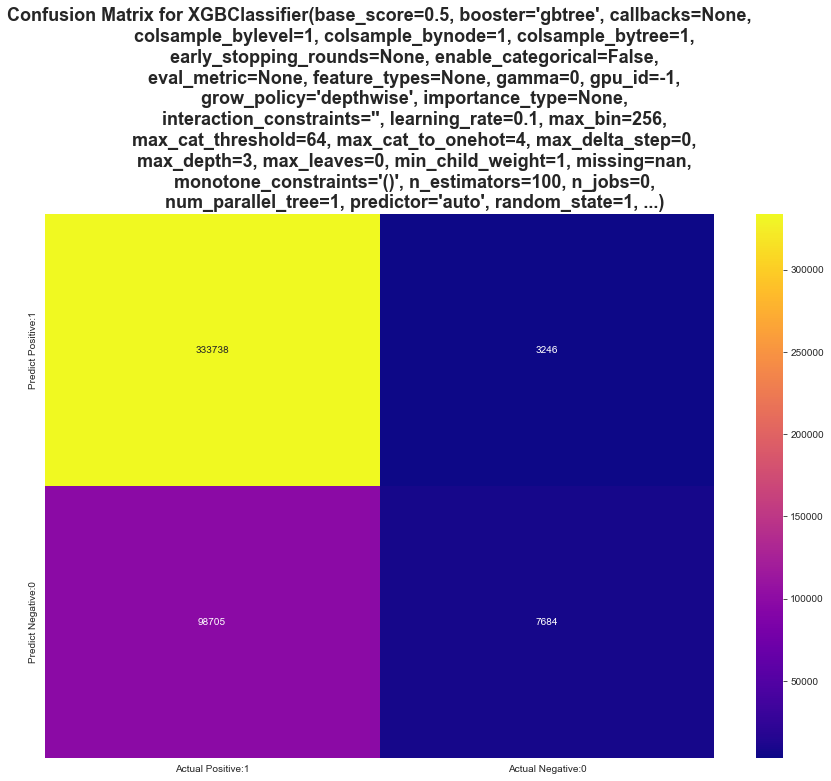

In [144]:
model_evaluation_new(xgb_classifier)

In [145]:
def model_compare(model):      
    return accuracy_score(new_target_var, model.predict(df_test_aug_v2)), recall_score(new_target_var, model.predict(df_test_aug_v2)), precision_score(new_target_var, model.predict(df_test_aug_v2)), f1_score(new_target_var, model.predict(df_test_aug_v2))

In [146]:
model_names = ['Decision Tree','Gradient Boost', 'XGBoost','Random forest']
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


In [147]:
# Decision Tree
accuracy_score_dtree, recall_score_dtree, precision_score_dtree, f1_score_dtree = model_compare(dt_classifier)

accuracy_scores.append(accuracy_score_dtree)
recall_scores.append(recall_score_dtree)
precision_scores.append(precision_score_dtree)
f1_scores.append(f1_score_dtree)

In [148]:
# Gradient Boosting
accuracy_score_gb, recall_score_gb, precision_score_gb, f1_score_gb = model_compare(gb_classifier)

accuracy_scores.append(accuracy_score_gb)
recall_scores.append(recall_score_gb)
precision_scores.append(precision_score_gb)
f1_scores.append(f1_score_gb)

In [149]:
# XG Boost
accuracy_score_xgb, recall_score_xgb, precision_score_xgb, f1_score_xgb = model_compare(xgb_classifier)

accuracy_scores.append(accuracy_score_xgb)
recall_scores.append(recall_score_xgb)
precision_scores.append(precision_score_xgb)
f1_scores.append(f1_score_xgb)

In [150]:
# Random Forest
accuracy_score_rf, recall_score_rf, precision_score_rf, f1_score_rf = model_compare(rfcv1)

accuracy_scores.append(accuracy_score_rf)
recall_scores.append(recall_score_rf)
precision_scores.append(precision_score_rf)
f1_scores.append(f1_score_rf)

In [151]:
model_comparison = pd.DataFrame(data=[accuracy_scores, recall_scores, precision_scores, f1_scores],
                               columns= model_names,
                                index = ['Accuracy', 'Recall', 'Precision', 'F1']
                               )
model_comparison

,Decision Tree,Gradient Boost,XGBoost,Random forest
Accuracy,0.630,0.769,0.770,0.760
Recall,0.401,0.101,0.072,0.177
Precision,0.298,0.620,0.703,0.500
F1,0.342,0.174,0.131,0.261


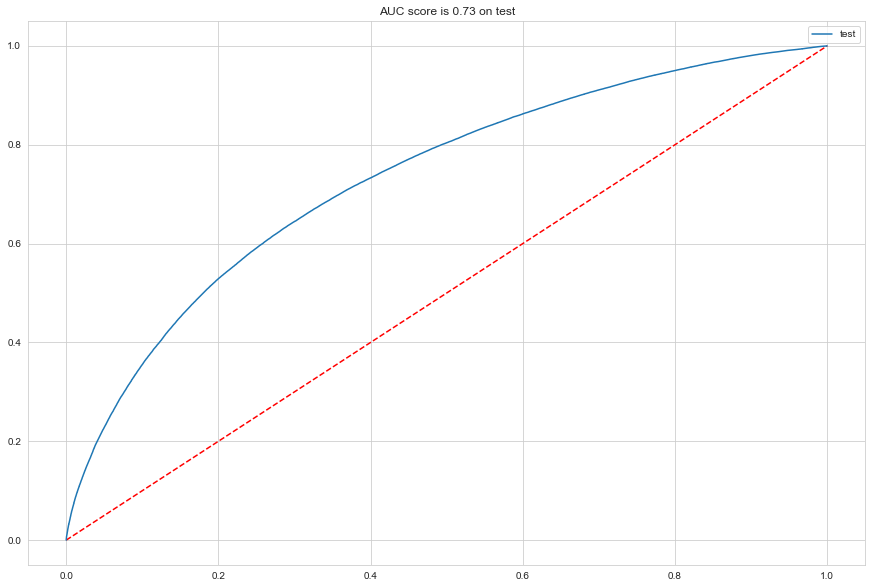

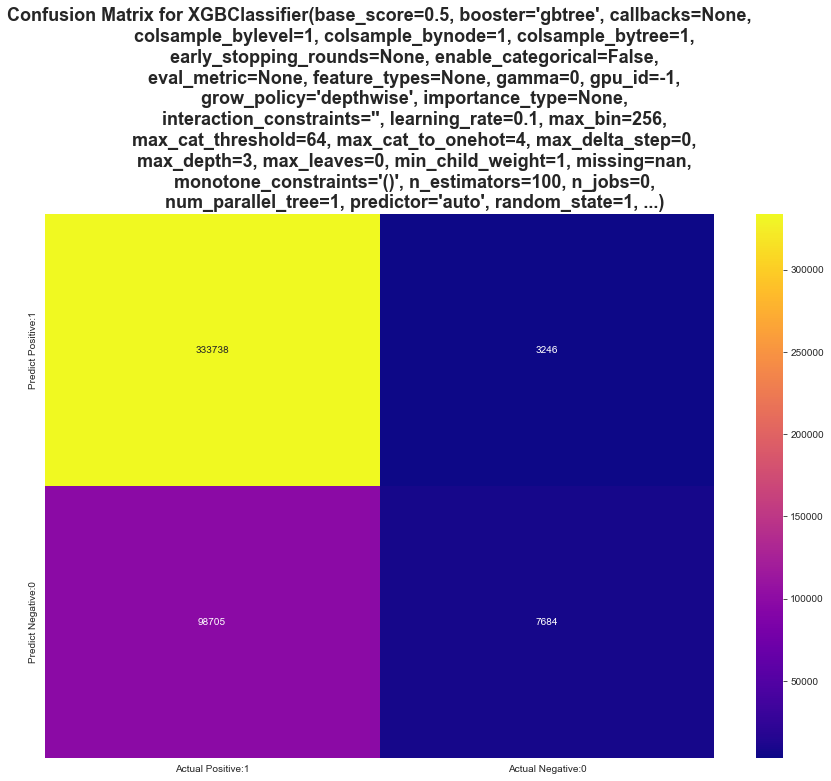

In [152]:
def model_evaluation_new(model, df_test_aug_v2, new_target_var):
    # Calculate ROC curve and AUC for test data
    fpr, tpr, _ = roc_curve(new_target_var, model.predict_proba(df_test_aug_v2)[:, 1])  # test AUC

    auc_test = roc_auc_score(new_target_var, model.predict_proba(df_test_aug_v2)[:, 1])

    # Create a DataFrame for the prediction values
    predictions = model.predict(df_test_aug_v2)  # Predictions for the test data
    prediction_df = pd.DataFrame({'Actual': new_target_var, 'Predicted': predictions})

    # Create and display ROC curve
    plt.figure(figsize=(15, 10))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.plot(fpr, tpr, label="test")

    plt.legend()
    plt.title('AUC score is %.2f on test' % (auc_test))
    plt.show()

    # Create and display confusion matrix
    plt.figure(figsize=(15, 10))
    plt.title(f"Confusion Matrix for {model}", fontsize=18, fontweight='bold')
    cm = confusion_matrix(new_target_var, predictions)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                             index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='plasma')
    plt.show()

    # Return the DataFrame containing predictions
    return prediction_df

# Assuming you have already defined rf, df_test_aug_v2, and new_target_var
result_df = model_evaluation_new(xgb_classifier, df_test_aug_v2, new_target_var)


In [153]:
result_df.head()

,Actual,Predicted
msisdn,,
263771000457,0,0
263771000681,0,0
263771001005,0,0
263771001054,1,0
263771001109,0,0


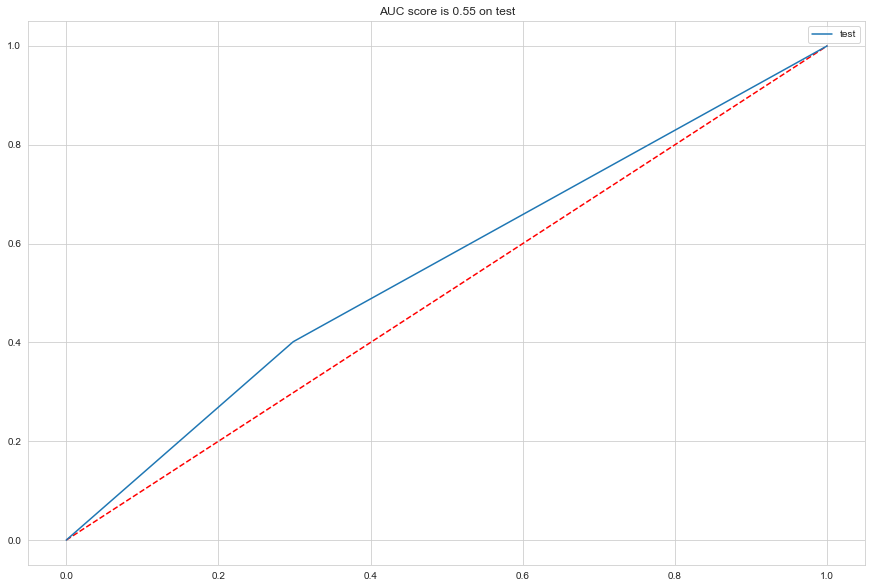

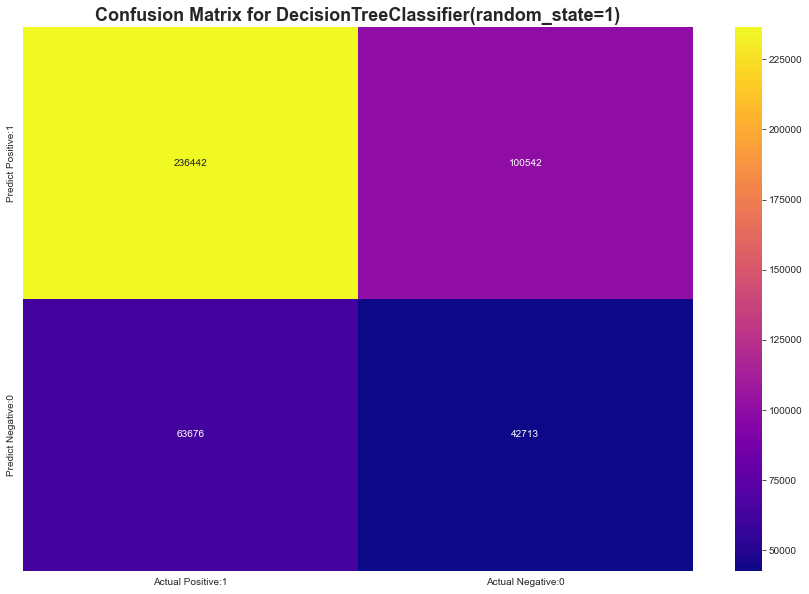

In [154]:
result_df_dtc = model_evaluation_new(dt_classifier, df_test_aug_v2, new_target_var)

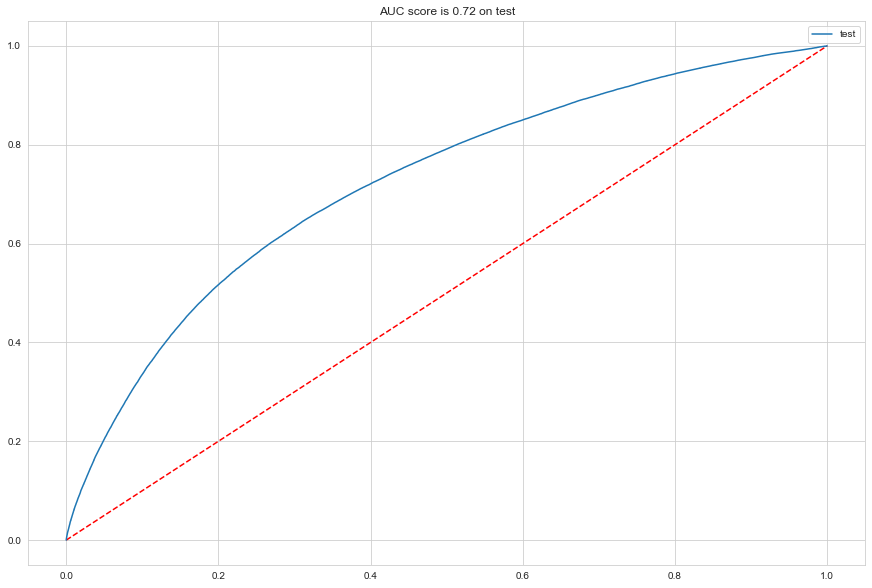

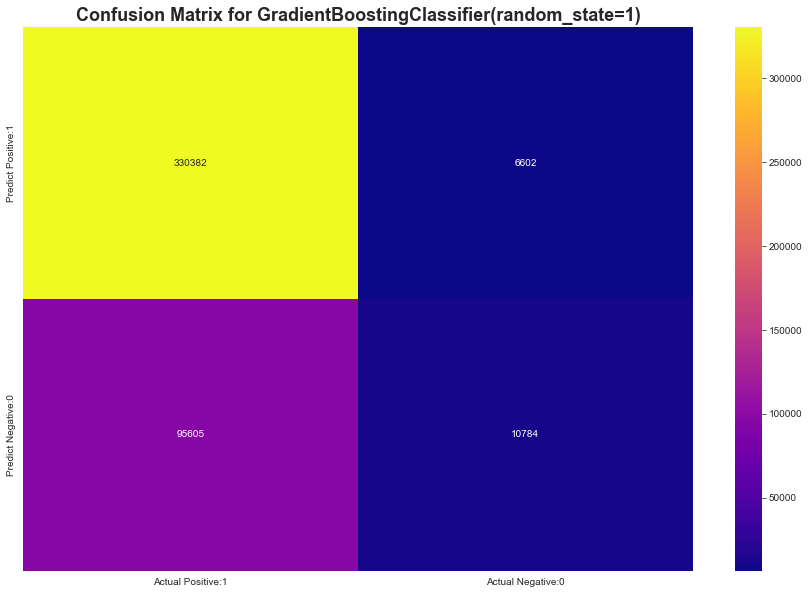

In [155]:
result_df_dtc = model_evaluation_new(gb_classifier, df_test_aug_v2, new_target_var)

In [156]:
result_df.value_counts()

Actual  Predicted
0       0            333738
1       0             98705
        1              7684
0       1              3246
dtype: int64

In [157]:
result_df_dtc.value_counts()

Actual  Predicted
0       0            330382
1       0             95605
        1             10784
0       1              6602
dtype: int64

In [160]:
result_df_xgb.value_counts()

Actual  Predicted
0       0            333738
1       0             98705
        1              7684
0       1              3246
dtype: int64

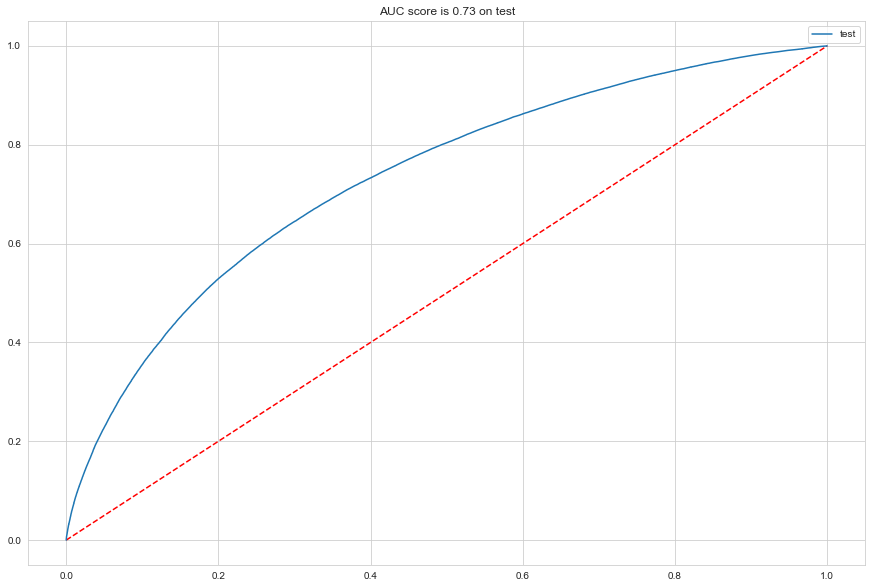

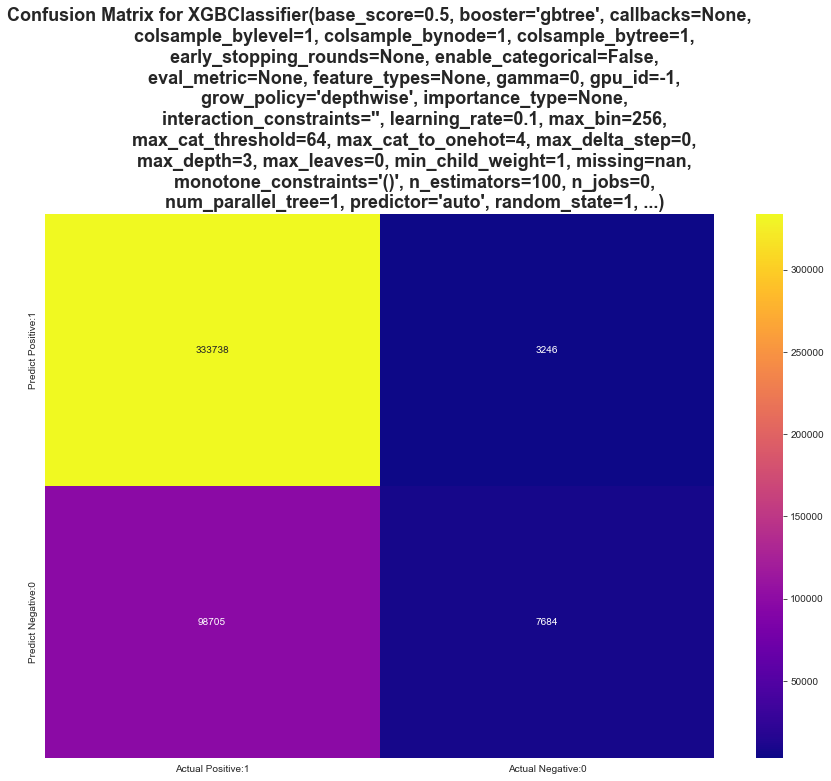

In [159]:
result_df_xgb = model_evaluation_new(xgb_classifier, df_test_aug_v2, new_target_var)

    True Positives (TP): The number of data points that were correctly predicted as positive (class 1).
    True Negatives (TN): The number of data points that were correctly predicted as negative (class 0).
    False Positives (FP): The number of data points that were incorrectly predicted as positive (class 1) when they are actually negative (class 0).
    False Negatives (FN): The number of data points that were incorrectly predicted as negative (class 0) when they are actually positive (class 1).

                     Actual Positive:1  Actual Negative:0
Predict Positive:1                 TP                 FP
Predict Negative:0                 FN                 TN


    The top-left cell (TP) represents the number of true positives, where the model correctly predicted positive when it was actually positive.
    The top-right cell (FP) represents the number of false positives, where the model incorrectly predicted positive when it was actually negative.
    The bottom-left cell (FN) represents the number of false negatives, where the model incorrectly predicted negative when it was actually positive.
    The bottom-right cell (TN) represents the number of true negatives, where the model correctly predicted negative when it was actually positive.

Example 1: ROC Curve and AUC

The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model as its discrimination threshold varies. It plots two key metrics:

    True Positive Rate (TPR): Also known as Sensitivity or Recall. It's the ratio of true positives to all actual positives. It measures the model's ability to correctly identify positive cases.

    TPR = TP / (TP + FN)

    False Positive Rate (FPR): It's the ratio of false positives to all actual negatives. It measures the model's ability to distinguish between positive and negative cases.

    FPR = FP / (FP + TN)

Now, let's consider a medical test for a disease where we have a classifier. Here's a simplified example:

    We have 100 patients.
    30 patients have the disease (positive cases), and 70 do not have the disease (negative cases).
    Our classifier provides predictions, and we vary the decision threshold to create an ROC curve.

	Actual Positive	Actual Negative
Predicted Pos	25 (True Pos)	10 (False Pos)
Predicted Neg	5 (False Neg)	60 (True Neg)

    True Positives (TP) = 25: The model correctly predicted 25 patients with the disease.
    False Positives (FP) = 10: The model predicted 10 patients have the disease when they do not.
    False Negatives (FN) = 5: The model failed to predict 5 patients with the disease.
    True Negatives (TN) = 60: The model correctly predicted 60 patients without the disease.

Now, we can calculate the TPR and FPR at different threshold levels to create the ROC curve. Each point on the ROC curve corresponds to a different threshold.

    At the default threshold, TPR = 25 / (25 + 5) = 0.83 and FPR = 10 / (10 + 60) = 0.14.
    At a different threshold, TPR and FPR values change, and we plot these points to form the ROC curve.

The AUC (Area Under the ROC Curve) is a single number that summarizes the overall performance of the model. It ranges from 0 to 1, with higher values indicating better performance. An AUC of 1 represents a perfect model, while an AUC of 0.5 indicates a random classifier.

Example 2: Confusion Matrix

A confusion matrix is a table that summarizes the performance of a classification model. It's created based on actual and predicted values. Consider the same medical test example:
	Actual Positive	Actual Negative
Predicted Pos	25 (True Pos)	10 (False Pos)
Predicted Neg	5 (False Neg)	60 (True Neg)

    True Positives (TP) = 25: The model correctly predicted 25 patients with the disease.
    False Positives (FP) = 10: The model predicted 10 patients have the disease when they do not.
    False Negatives (FN) = 5: The model failed to predict 5 patients with the disease.
    True Negatives (TN) = 60: The model correctly predicted 60 patients without the disease.

From the confusion matrix, you can calculate various metrics:

    Accuracy: (TP + TN) / (TP + TN + FP + FN) = (25 + 60) / (25 + 60 + 10 + 5) = 85 / 100 = 0.85 (85%)

Accuracy measures the overall correctness of predictions.

    Precision: TP / (TP + FP) = 25 / (25 + 10) = 0.71 (71%)

Precision measures the accuracy of positive predictions.

    Recall (Sensitivity): TP / (TP + FN) = 25 / (25 + 5) = 0.83 (83%)

Recall measures the model's ability to correctly identify positive cases.

    Specificity: TN / (TN + FP) = 60 / (60 + 10) = 0.86 (86%)

Specificity measures the model's ability to correctly identify negative cases.

    F1-Score: A harmonic mean of precision and recall, providing a balanced measure.

These metrics provide a more detailed understanding of the model's performance beyond accuracy and help you assess its suitability for specific use cases.

In [161]:
df_test_aug_old.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,Harare South,9,LVC,0.592,143.250,25,485.343,29969.672,Female,Smartphone,N,48.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
263771000681,1,0,0,0,0,0,0,Harare North,5,LVC,0.000,91.583,13,909.872,15001.024,Male,Mobile Phone/Feature phone,Y,54.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
263771001005,0,0,1,0,0,0,0,Unmapped,30,HVC,2.718,312.433,662,32471.186,185490.216,Male,Smartphone,Y,43.000,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,11,LVC,0.000,0.283,236,4155.914,4182.663,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1.000,99999.000,5264.105,1.000,99999.000,5264.105,185.000,0.894,NaN,20
263771001109,1,0,0,0,0,0,0,Mashonaland C + W,4,LVC,0.000,42.950,23,2153.996,13794.863,Male,Unmapped,Unmapped,27.000,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [162]:
df_test_aug_test_v1.head()

,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
msisdn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
263771000457,0,0,0,1,0,0,0,Harare South,9,LVC,0.592,143.250,25,485.343,29969.672,Female,Smartphone,N,48.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
263771000681,1,0,0,0,0,0,0,Harare North,5,LVC,0.000,91.583,13,909.872,15001.024,Male,Mobile Phone/Feature phone,Y,54.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
263771001005,0,0,1,0,0,0,0,Unmapped,30,HVC,2.718,312.433,662,32471.186,185490.216,Male,Smartphone,Y,43.000,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,11,LVC,0.000,0.283,236,4155.914,4182.663,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1.000,99999.000,5264.105,1.000,99999.000,5264.105,185.000,0.894,NaN,20
263771001109,1,0,0,0,0,0,0,Mashonaland C + W,4,LVC,0.000,42.950,23,2153.996,13794.863,Male,Unmapped,Unmapped,27.000,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [163]:
#df_test_aug_test.reset_index(drop=True)

df_test_aug_test = df_test_aug_test.reset_index(drop=False)

# The resulting DataFrame df_reset will have the old index as a new column, and a new sequential index.


In [164]:
df_test_aug_test.head()

,msisdn,sms_5_cust,sms_10_cust,sms_25_cust,sms_125_cust,sms_200_cust,sms_300_cust,flag_final,region,sms_distinct_days,overall_cust_segment,data_usage,voice_usage,sms_usage,sms_revenue,total_revenue,gender,device_type,dual_sim,age,aon,smb_min_value,smb_max_value,smb_avg_value,dfb_min_value,dfb_max_value,dfb_avg_value,utilization_rate_percentage,effective_rate_percentage,recharges_by_others_in_usd,region_conv_rate
0,263771000457,0,0,0,1,0,0,0,Harare South,9,LVC,0.592,143.250,25,485.343,29969.672,Female,Smartphone,N,48.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
1,263771000681,1,0,0,0,0,0,0,Harare North,5,LVC,0.000,91.583,13,909.872,15001.024,Male,Mobile Phone/Feature phone,Y,54.000,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,263771001005,0,0,1,0,0,0,0,Unmapped,30,HVC,2.718,312.433,662,32471.186,185490.216,Male,Smartphone,Y,43.000,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
3,263771001054,1,0,0,0,0,0,1,Mashonaland East + CZA,11,LVC,0.000,0.283,236,4155.914,4182.663,Female,Mobile Phone/Feature phone,Y,43.000,10.000,1.000,99999.000,5264.105,1.000,99999.000,5264.105,185.000,0.894,NaN,20
4,263771001109,1,0,0,0,0,0,0,Mashonaland C + W,4,LVC,0.000,42.950,23,2153.996,13794.863,Male,Unmapped,Unmapped,27.000,6.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [165]:
test1= result_df.insert(0,'msisdn', df_test_aug_test['msisdn'])
#df_categorical.set_index('msisdn', inplace=True)
#df_categorical.head()

In [166]:
test2=pd.DataFrame(test1)

In [167]:
test2.head()

""


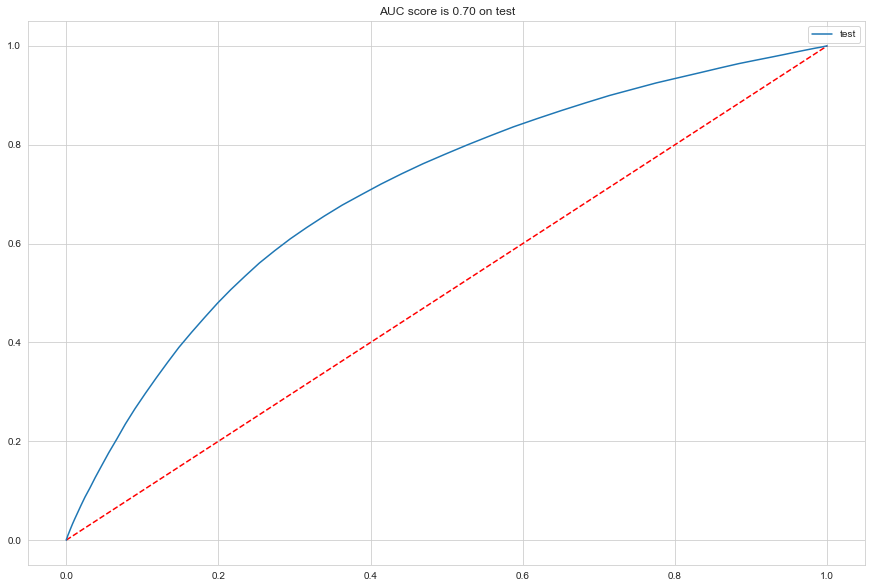

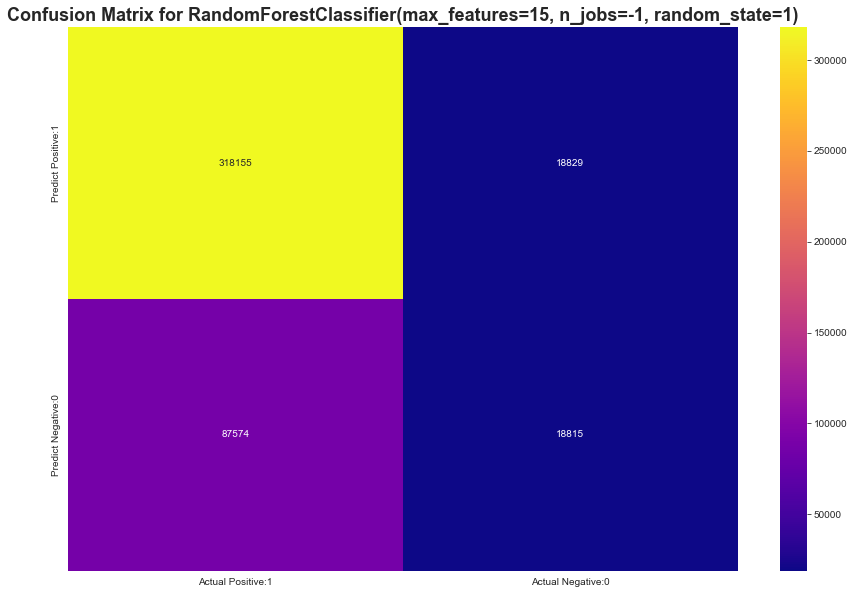

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

def model_evaluation_new(model, df_test_aug_v2, new_target_var):
    # Get predictions
    predictions = model.predict(df_test_aug_v2)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(new_target_var, model.predict_proba(df_test_aug_v2)[:,1]) # Test AUC
    
    plt.figure(figsize=(15, 10))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.plot(fpr, tpr, label="test")
        
    auc_test = roc_auc_score(new_target_var, model.predict_proba(df_test_aug_v2)[:,1])
        
    plt.legend()
    plt.title('AUC score is %.2f on test'%(auc_test))
    plt.show()
    
    # Create and plot confusion matrix
    plt.figure(figsize=(15, 10))
    plt.title(f"Confusion Matrix for {model}", fontsize=18, fontweight='bold')
    cm = confusion_matrix(new_target_var, predictions)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                             index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt="d", cmap='plasma')
    plt.show()
    
    # Return the predictions
    return predictions

# Usage example:
rf_predictions = model_evaluation_new(rfcv1, df_test_aug_v2, new_target_var)


In [169]:
rf_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
rf_predictions_v1=pd.DataFrame(rf_predictions)

In [171]:
rf_predictions_v1.value_counts()

0    405729
1     37644
dtype: int64

In [172]:
df_test_aug_test.columns

Index(['msisdn', 'sms_5_cust', 'sms_10_cust', 'sms_25_cust', 'sms_125_cust', 'sms_200_cust', 'sms_300_cust', 'flag_final', 'region', 'sms_distinct_days', 'overall_cust_segment', 'data_usage', 'voice_usage', 'sms_usage', 'sms_revenue', 'total_revenue', 'gender', 'device_type', 'dual_sim', 'age', 'aon', 'smb_min_value', 'smb_max_value', 'smb_avg_value', 'dfb_min_value', 'dfb_max_value', 'dfb_avg_value', 'utilization_rate_percentage', 'effective_rate_percentage', 'recharges_by_others_in_usd', 'region_conv_rate'], dtype='object')

In [173]:
y_test.value_counts()

0    109583
1     32643
Name: flag_final, dtype: int64

In [174]:
test11= rf_predictions_v1.insert(0,'msisdn', df_test_aug_test['msisdn'])

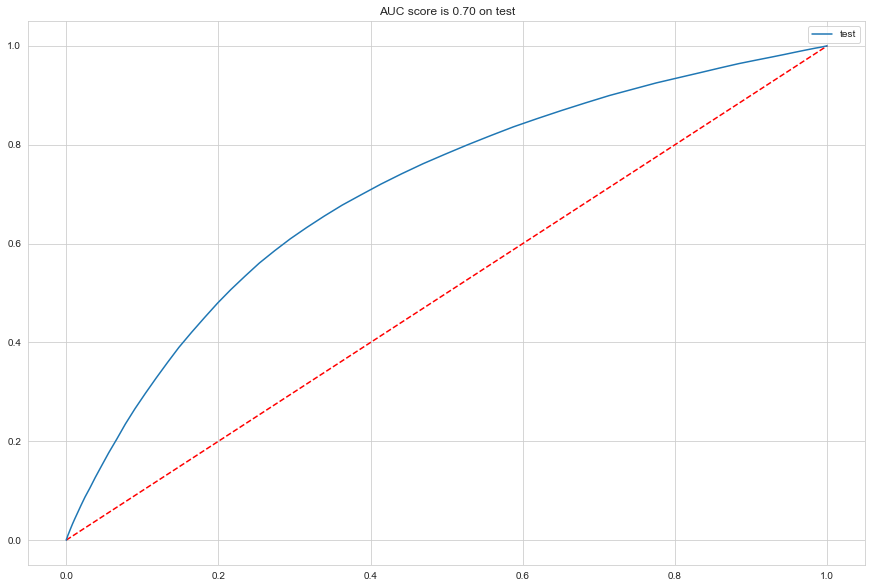

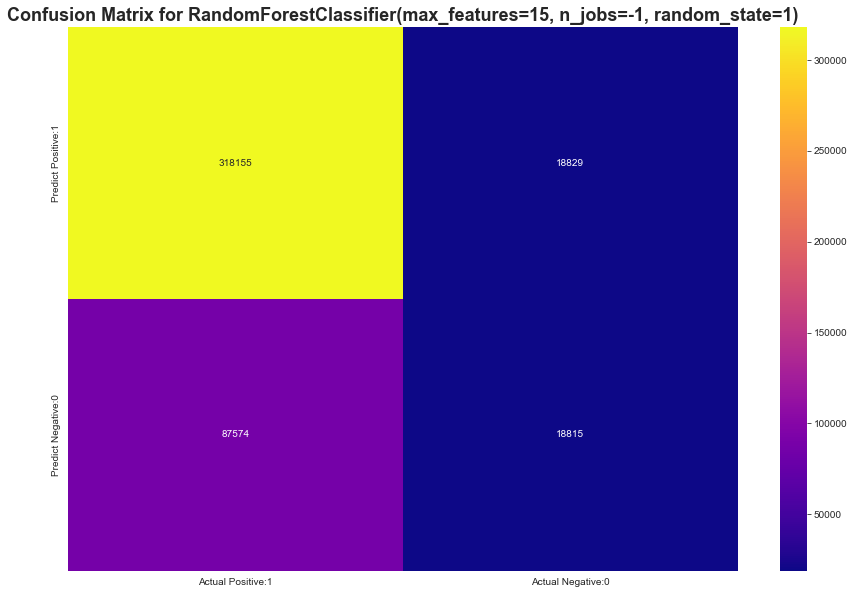

In [175]:
# Assuming rf_predictions_v1 is a pandas Series or array-like object
rf_predictions_v1 = model_evaluation_new(rfcv1, df_test_aug_v2, new_target_var)

# Ensure the indices match
rf_df11 = pd.DataFrame({'Predictions': rf_predictions_v1}, index=new_target_var.index)

# Now rf_df11 should have the same index as new_target_var


In [176]:
rf_df11.head()

,Predictions
msisdn,
263771000457,0
263771000681,0
263771001005,0
263771001054,0
263771001109,0


In [177]:
rf_df11.value_counts()

Predictions
0              405729
1               37644
dtype: int64

In [178]:
rf_df11.shape

(443373, 1)

In [179]:
new_target_var.shape

(443373,)

In [180]:
new_target_var.head()

msisdn
263771000457    0
263771000681    0
263771001005    0
263771001054    1
263771001109    0
Name: flag_final, dtype: int64

In [181]:
new_target_var['msisdn'] = rf_df11.index

In [182]:
rf_df11.shape

(443373, 1)

In [183]:
new_target_var['msisdn']

Int64Index([263771000457, 263771000681, 263771001005, 263771001054, 263771001109, 263771001142, 263771001261, 263771001320, 263771001336, 263771001498,
            ...
            263789993459, 263789993756, 263789993774, 263789994416, 263789995351, 263789996736, 263789997741, 263789997890, 263789999352, 263789999847], dtype='int64', name='msisdn', length=443373)

In [184]:
rf_df11['msisdn']=rf_df11.index

In [185]:
rf_df11['msisdn'].head()

msisdn
263771000457    263771000457
263771000681    263771000681
263771001005    263771001005
263771001054    263771001054
263771001109    263771001109
Name: msisdn, dtype: int64

In [186]:
rf_df11.head()

,Predictions,msisdn
msisdn,,
263771000457,0,263771000457
263771000681,0,263771000681
263771001005,0,263771001005
263771001054,0,263771001054
263771001109,0,263771001109


In [187]:
rf_df11.head()

,Predictions,msisdn
msisdn,,
263771000457,0,263771000457
263771000681,0,263771000681
263771001005,0,263771001005
263771001054,0,263771001054
263771001109,0,263771001109


In [188]:
rf_df11.Predictions.value_counts()

0    405729
1     37644
Name: Predictions, dtype: int64

In [189]:
filtered_df = rf_df11[rf_df11['Predictions'] == 1]

In [190]:
filtered_df.head()

,Predictions,msisdn
msisdn,,
263771002916,1,263771002916
263771002924,1,263771002924
263771003813,1,263771003813
263771006704,1,263771006704
263771007877,1,263771007877


In [191]:
filtered_df.shape

(37644, 2)

In [192]:
filtered_df.to_csv('sms_model_cust_conv_usd_pred_oct.csv')

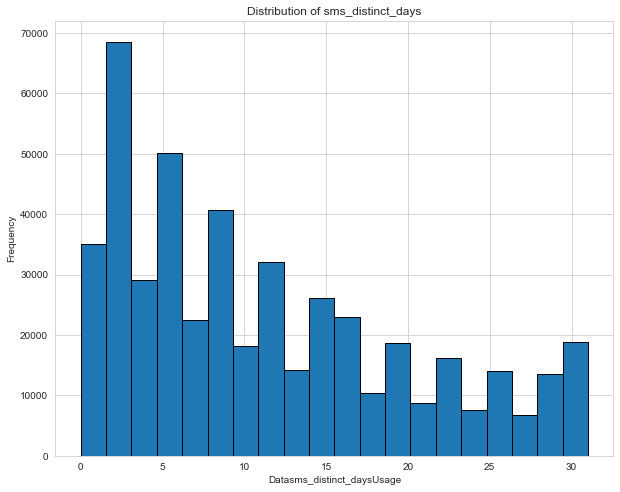

In [58]:
import matplotlib.pyplot as plt

# Create a histogram for 'data_usage'
plt.figure(figsize=(10, 8))
plt.hist(df1['sms_distinct_days'], bins=20, edgecolor='k')
plt.xlabel('Datasms_distinct_daysUsage')
plt.ylabel('Frequency')
plt.title('Distribution of sms_distinct_days')
plt.show()


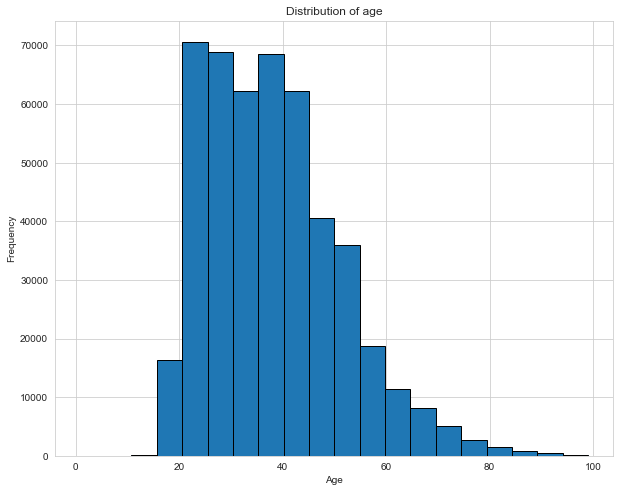

In [59]:
import matplotlib.pyplot as plt

# Create a histogram for 'data_usage'
plt.figure(figsize=(10, 8))

plt.hist(df1['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()


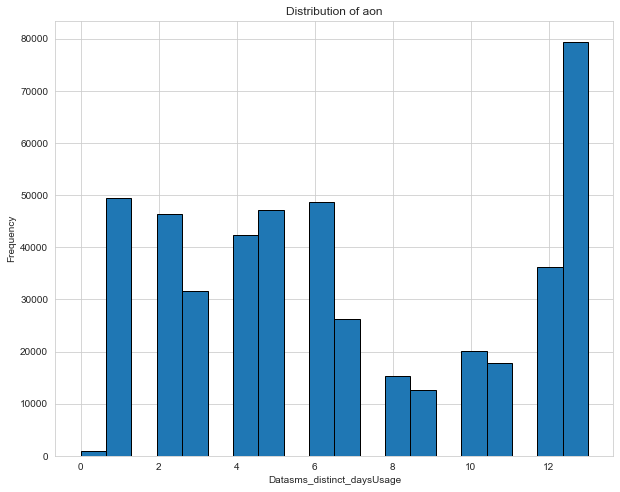

In [60]:
import matplotlib.pyplot as plt

# Create a histogram for 'data_usage'
plt.figure(figsize=(10, 8))

plt.hist(df1['aon'], bins=20, edgecolor='k')
plt.xlabel('Datasms_distinct_daysUsage')
plt.ylabel('Frequency')
plt.title('Distribution of aon')
plt.show()


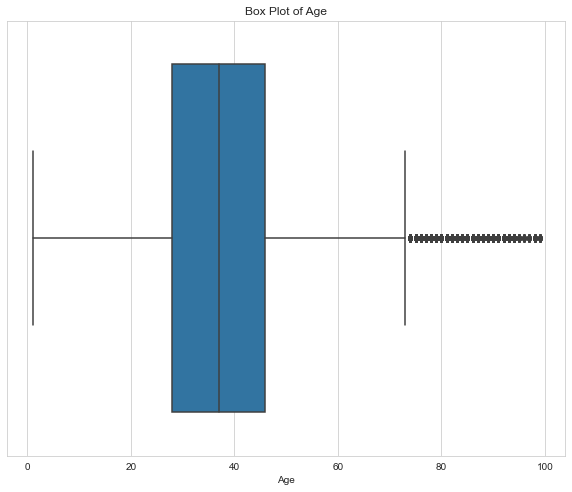

In [61]:
import seaborn as sns
plt.figure(figsize=(10, 8))


sns.boxplot(x='age', data=df1)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()


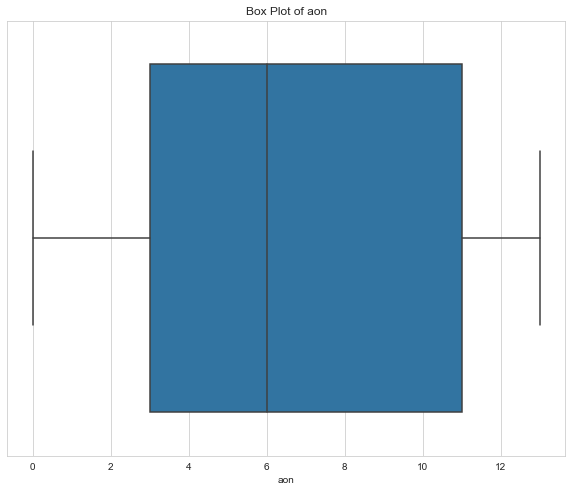

In [62]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.boxplot(x='aon', data=df1)
plt.xlabel('aon')
plt.title('Box Plot of aon')
plt.show()


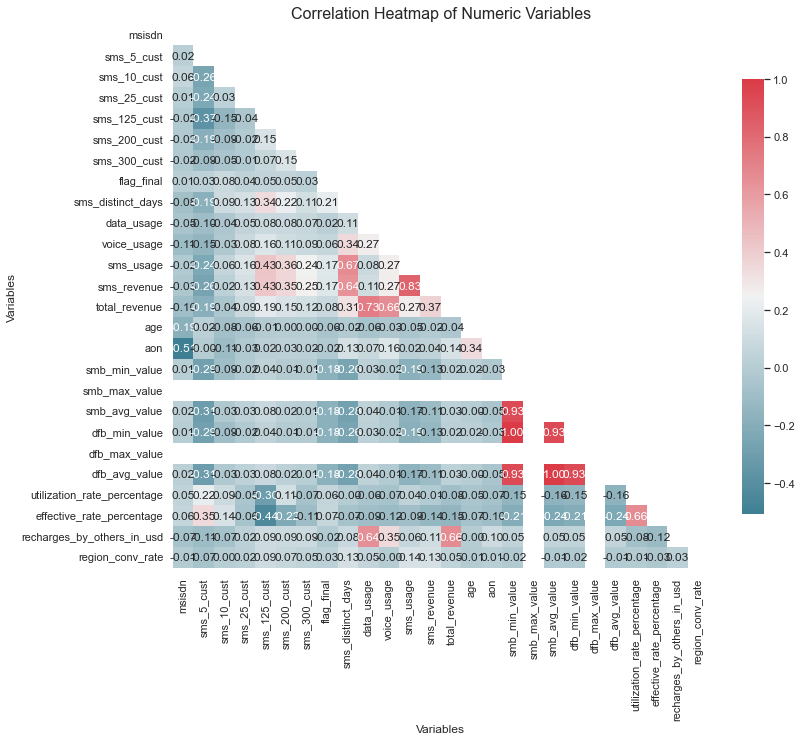

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context for Seaborn
sns.set(style="white")  # You can choose other styles like "darkgrid", "whitegrid", etc.
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Create a mask to hide the upper triangle for better readability
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Define a custom color palette (you can choose your own colors)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, mask=mask, cbar_kws={"shrink": 0.8})

# Customize the plot labels and title
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Show the plot
plt.show()


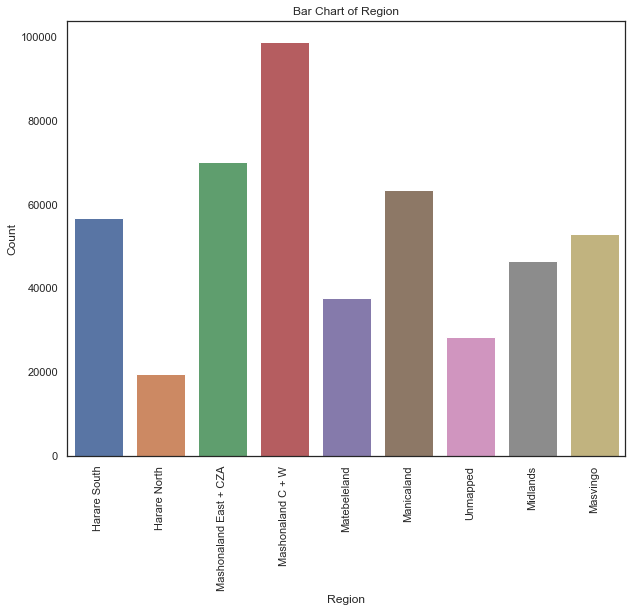

In [65]:
import seaborn as sns
plt.figure(figsize=(10, 8))

sns.countplot(x='region', data=df1)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Bar Chart of Region')
plt.show()


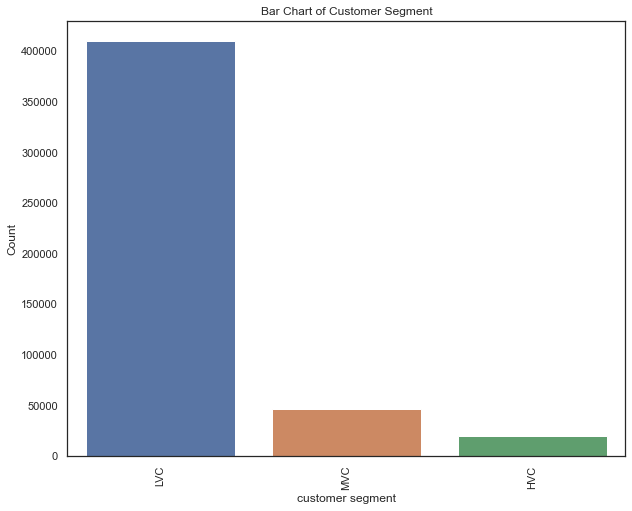

In [66]:
import seaborn as sns
plt.figure(figsize=(10, 8))

sns.countplot(x='overall_cust_segment', data=df1)
plt.xticks(rotation=90)
plt.xlabel('customer segment')
plt.ylabel('Count')
plt.title('Bar Chart of Customer Segment')
plt.show()


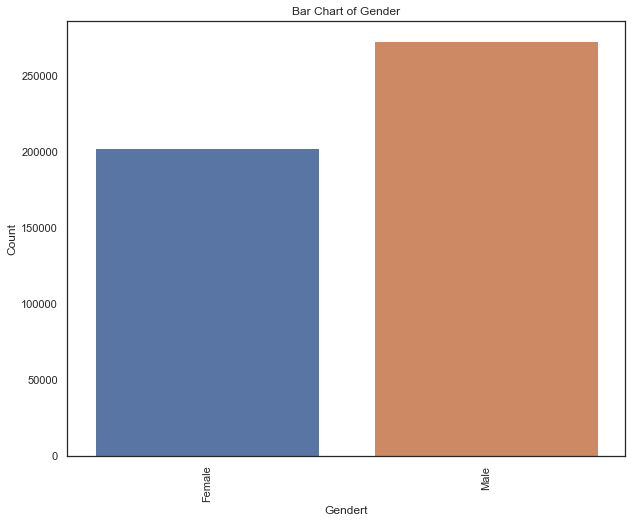

In [67]:
import seaborn as sns
plt.figure(figsize=(10, 8))

sns.countplot(x='gender', data=df1)
plt.xticks(rotation=90)
plt.xlabel('Gendert')
plt.ylabel('Count')
plt.title('Bar Chart of Gender')
plt.show()


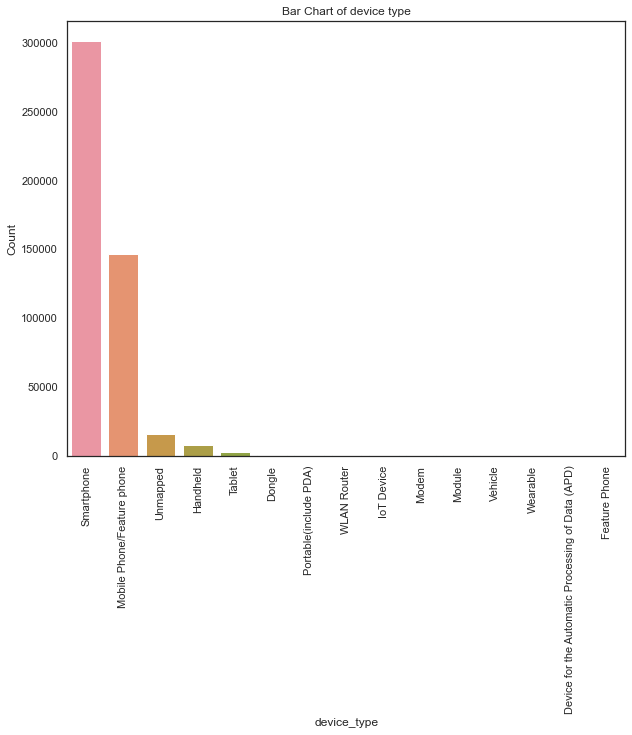

In [68]:
import seaborn as sns
plt.figure(figsize=(10, 8))

sns.countplot(x='device_type', data=df1)
plt.xticks(rotation=90)
plt.xlabel('device_type')
plt.ylabel('Count')
plt.title('Bar Chart of device type')
plt.show()


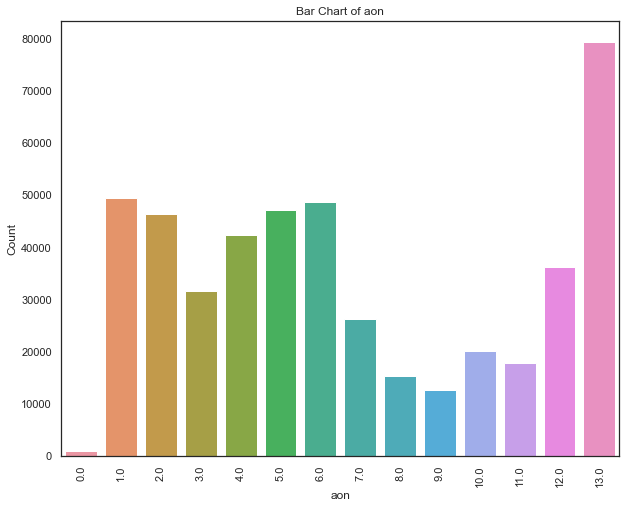

In [69]:
import seaborn as sns
plt.figure(figsize=(10, 8))

sns.countplot(x='aon', data=df1)
plt.xticks(rotation=90)
plt.xlabel('aon')
plt.ylabel('Count')
plt.title('Bar Chart of aon')
plt.show()


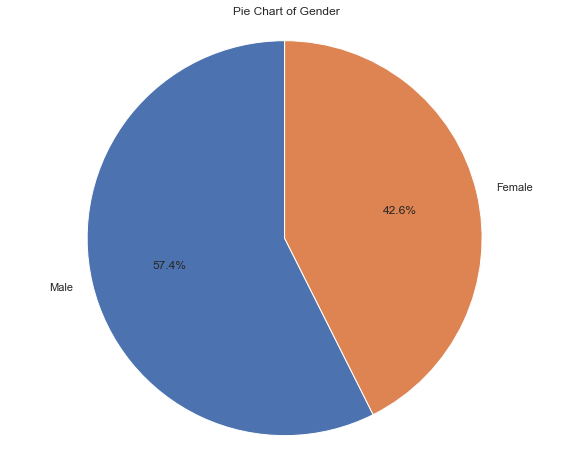

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

gender_counts = df1['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of Gender')
plt.show()

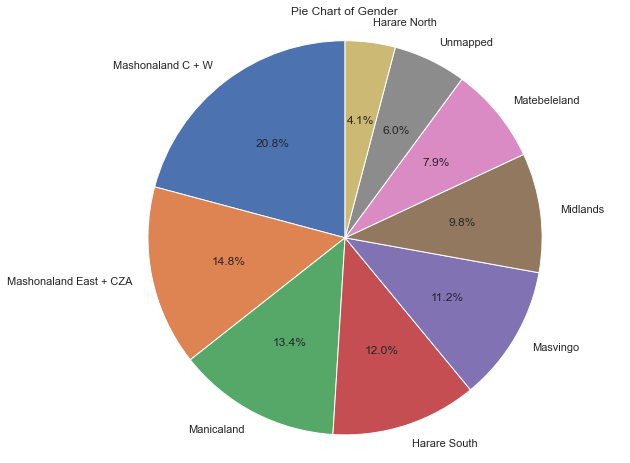

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

gender_counts = df1['region'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of Gender')
plt.show()


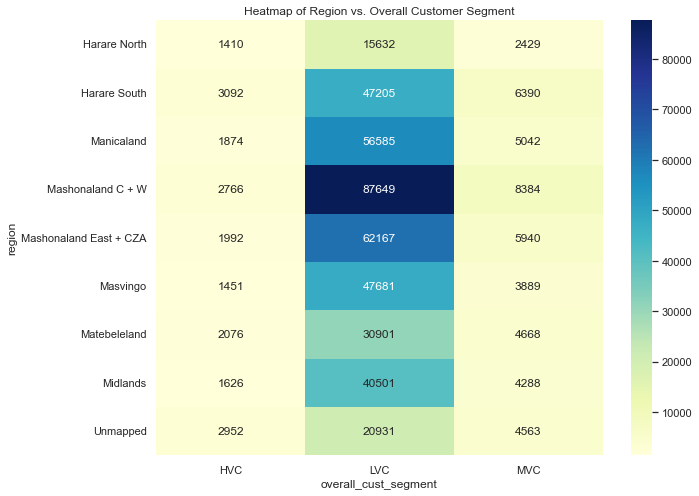

In [72]:
import seaborn as sns
plt.figure(figsize=(10, 8))

pivot_table = df1.pivot_table(index='region', columns='overall_cust_segment', aggfunc='size')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Region vs. Overall Customer Segment')
plt.show()


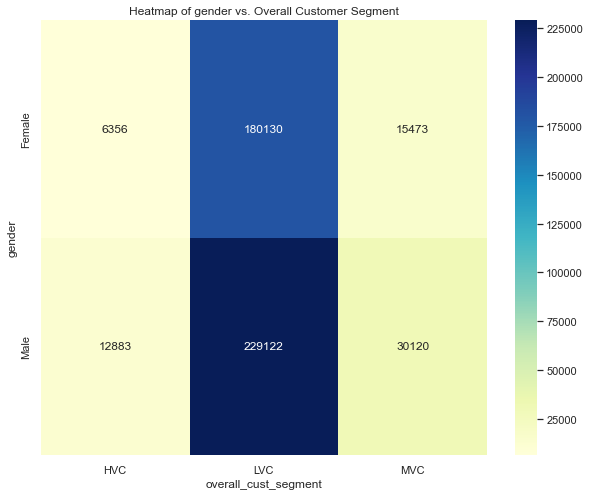

In [73]:
import seaborn as sns
plt.figure(figsize=(10, 8))

pivot_table = df1.pivot_table(index='gender', columns='overall_cust_segment', aggfunc='size')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of gender vs. Overall Customer Segment')
plt.show()


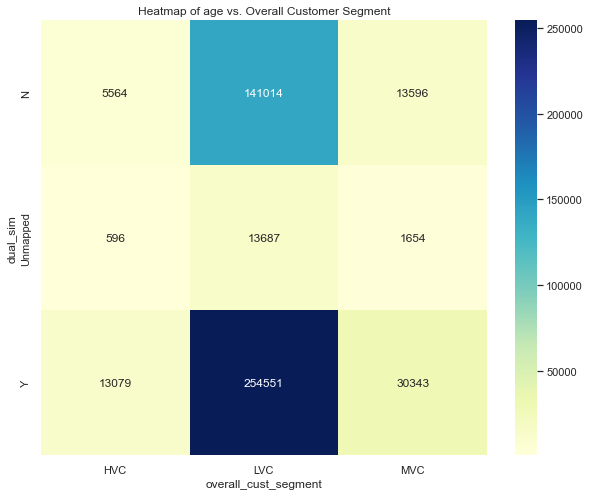

In [74]:
import seaborn as sns
plt.figure(figsize=(10, 8))

pivot_table = df1.pivot_table(index='dual_sim', columns='overall_cust_segment', aggfunc='size')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of age vs. Overall Customer Segment')
plt.show()


In [75]:
import seaborn as sns

corr_matrix = df2.corr()

# Get the correlation values as text
correlation_text = corr_matrix.to_string()

# Print the correlation values
print("Correlation Heatmap of Numeric Variables:")
print(correlation_text)


NameError: name 'df2' is not defined

In [ ]:
df2.head()

In [ ]:
from colorama import Fore
from termcolor import colored

df_temp = df2.corr()

feature = []
collinear = []

for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i] > 0.85 and df_temp[col][i] < 1) or (df_temp[col][i] < -0.85 and df_temp[col][i] > -1):
            feature.append(col)
            collinear.append(i)
            print(Fore.RED + f"\033[1mmulticollinearity alert\033[0m between {col} - {i}")
        else:
            print(f"For {col} and {i}, there is \033[1mNO multicollinearity problem\033[0m")

unique_list = list(set(feature + collinear))

print(colored('*' * 80, 'cyan', attrs=['bold']))
print("\033[1mThe total number of strongly correlated features:\033[0m", len(unique_list))


In [ ]:
from colorama import Fore, init
from termcolor import colored

# Initialize colorama to work with Windows
init()

df_temp = df2.corr()

feature = []
collinear = []

for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i] > 0.85 and df_temp[col][i] < 1) or (df_temp[col][i] < -0.85 and df_temp[col][i] > -1):
            feature.append(col)
            collinear.append(i)
            print(Fore.RED + f"\033[1mmulticollinearity alert\033[0m between {col} - {i}")
        else:
            print(f"For {col} and {i}, there is \033[1mNO multicollinearity problem\033[0m")

unique_list = list(set(feature + collinear))

print(colored('*' * 80, 'cyan', attrs=['bold']))
print("\033[1mThe total number of strongly correlated features:\033[0m", len(unique_list))

# Print the list of strongly correlated columns
print("\033[1mList of strongly correlated columns:\033[0m", unique_list)


In [ ]:
corrmat = df2.corr()

plt.figure(figsize=(18,12))  
#sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)
sns.heatmap(corrmat, annot = True, cmap = 'coolwarm', center = 0)

    Strong Positive Correlations:
        flag_final has a strong positive correlation with sms_distinct_days (0.343) and total_revenue (0.345).
        sms_distinct_days also has a strong positive correlation with data_usage (0.349) and sms_usage (0.644).

    Moderate Positive Correlations:
        total_revenue has moderate positive correlations with data_usage (0.724) and voice_usage (0.647).
        sms_usage has a moderate positive correlation with sms_revenue (0.860).

    Negative Correlations:
        aon (Age on Network) has a negative correlation with many variables, indicating that as the age on network increases, some other variables tend to decrease. For example, it has negative correlations with data_usage, voice_usage, sms_usage, sms_revenue, and total_revenue.
        sms_5_cust, sms_10_cust, sms_25_cust, and sms_125_cust have negative correlations with several variables, suggesting that as these variables increase, others tend to decrease.

    Strong Positive Correlation between SMB and DFB Values:
        smb_min_value, smb_avg_value, dfb_min_value, and dfb_avg_value have identical strong positive correlations with each other, indicating a high level of interdependence among these variables.

    Region Conversion Rate:
        region_conv_rate has a relatively weak positive correlation with most other variables, indicating that it may not strongly influence the other numeric variables.

    Effective Rate Percentage and Recharges by Others:
        effective_rate_percentage and recharges_by_others_in_usd have a moderate negative correlation with each other (-0.116), suggesting that as one increases, the other tends to decrease.

    Utilization Rate Percentage:
        utilization_rate_percentage has a moderate positive correlation with effective_rate_percentage (0.256), indicating a relationship between these two variables.

It's important to note that correlation does not imply causation. These insights show associations between variables but do not necessarily indicate a causal relationship. Further analysis and domain knowledge are needed to draw meaningful conclusions from these correlations. Additionally, the specific context a

In [76]:
corrmat = df2.corr()

plt.figure(figsize=(18,12))  
#sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)
sns.heatmap(corrmat, annot = True, cmap = 'coolwarm', center = 0)

NameError: name 'df2' is not defined

In [ ]:
df_corr = df_test_aug_test.select_dtypes(include=np.number)
df_corr.head()

In [ ]:
# Assuming you want to drop multiple columns ['column1', 'column2', 'column3']
columns_to_drop = [ 'smb_max_value', 'dfb_max_value']
df2 = df_corr.drop(columns=columns_to_drop, axis=1)


In [ ]:
df2.columns

In [ ]:
df1.columns

In [ ]:

# Replace 'gender' and 'flag_final' with your actual column names from your DataFrame
# Ensure that these columns exist in your DataFrame df1
sns.set(style="whitegrid")  # Set the style of the plot

# Assuming 'gender' and 'flag_final' are column names in your DataFrame
sns.barplot(x="gender", y="flag_final", data=df1, palette=['blue', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('')
plt.title('Bar Plot of Gender vs flag final')

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'gender' and 'flag_final' with your actual column names from your DataFrame
# Ensure that these columns exist in your DataFrame df1
sns.set(style="whitegrid")  # Set the style of the plot

# Assuming 'gender' and 'flag_final' are column names in your DataFrame
sns.barplot(x="gender", y="flag_final", data=df1, palette=['blue', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Flag Final (0 or 1)')  # Update the y-axis label
plt.title('Bar Plot of Gender vs Flag Final')

# Show the plot
plt.show()


In [ ]:
#
## Sample data (replace this with your actual data)
#data = {
#    "gender": ["Male", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male", "Female"],
#    "flag_final": [12, 15, 9, 7, 18, 20, 11, 22, 14, 17]
#}
#
## Create a DataFrame from your data
#import pandas as pd
#df1 = pd.DataFrame(data)
#
# Create a boxplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))  # Set the figure size

sns.boxplot(x="gender", y="flag_final", data=df1)

# Customize the plot
plt.title("Boxplot of flag_final by gender")
plt.xlabel("Gender")
plt.ylabel("flag_final")

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from your data
data = {
    'Gender': ['Female', 'Male'],
    'ZWL': [157394, 211503],
    'USD': [45795, 63214]
}

df = pd.DataFrame(data)

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.title('Boxplot of ZWL and USD by Gender')
plt.ylabel('Amount')
plt.xticks(range(1, len(df) + 1), df['Gender'])

# Create boxplots for 'ZWL' and 'USD'
plt.boxplot([df['ZWL'], df['USD']], labels=['ZWL', 'USD'])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from your data
data = {
    'Gender': ['Female', 'Male'],
    'ZWL': [157394, 211503],
    'USD': [45795, 63214]
}

df = pd.DataFrame(data)

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.title('Boxplot of ZWL and USD by Gender')
plt.ylabel('Amount')
plt.xticks(range(1, len(df) + 1), df['Gender'])

# Create boxplots for 'ZWL' and 'USD'
bp = plt.boxplot([df['ZWL'], df['USD']], labels=['ZWL', 'USD'])

# Create a legend for Gender
plt.legend(handles=[bp["boxes"][0], bp["boxes"][1]], labels=['Female', 'Male'], title='Gender', loc='upper right')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from your data
data = {
    'Gender': ['Female', 'Male'],
    'ZWL': [157394, 211503],
    'USD': [45795, 63214]
}

df = pd.DataFrame(data)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35  # Width of the bars

x = range(len(df))
x_labels = df['Gender']

plt.title('Count of Flags (ZWL and USD) by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(x, x_labels)

zwl_bars = ax.bar(x, df['ZWL'], width, label='ZWL')
usd_bars = ax.bar([i + width for i in x], df['USD'], width, label='USD')

# Add labels on top of the bars
for bar in [zwl_bars, usd_bars]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()


In [ ]:

data = {
    'Region': ['Harare North', 'Harare South', 'Manicaland', 'Mashonaland C + W', 'Mashonaland East + CZA', 'Masvingo', 'Matebeleland', 'Midlands', 'Unmapped'],
    'ZWL': [15553, 45055, 50020, 77283, 55516, 42073, 30036, 36500, 21187],
    'USD': [4258, 12588, 14937, 23377, 15709, 12235, 8288, 11192, 7715]
}

df = pd.DataFrame(data)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 6))
width = 0.35  # Width of the bars

x = range(len(df))
x_labels = df['Region']

plt.title('Count of Flags (ZWL and USD) by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(x, x_labels)

zwl_bars = ax.bar(x, df['ZWL'], width, label='ZWL')
usd_bars = ax.bar([i + width for i in x], df['USD'], width, label='USD')

# Add labels on top of the bars
for bar in [zwl_bars, usd_bars]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()



In [ ]:
Segment	zwl 	usd
HVC	13834	5652
LVC	327933	89782
MVC	31456	14865


In [ ]:

data = {
    'segment': ['HVC', 'LVC', 'MVC'],
    'ZWL': [13834, 327933, 31456],
    'USD': [5652, 89782, 14865]
}

df = pd.DataFrame(data)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 6))
width = 0.35  # Width of the bars

x = range(len(df))
x_labels = df['segment']

plt.title('Count of Flags (ZWL and USD) by segment')
plt.xlabel('segment')
plt.ylabel('Count')
plt.xticks(x, x_labels)

zwl_bars = ax.bar(x, df['ZWL'], width, label='ZWL')
usd_bars = ax.bar([i + width for i in x], df['USD'], width, label='USD')

# Add labels on top of the bars
for bar in [zwl_bars, usd_bars]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()



In [ ]:
data = {
    'Region': [
        'Dongle', 'Feature Phone', 'Handheld', 'IoT Device', 
        'Mobile Phone/Feature phone', 'Modem', 'Module', 'Portable(include PDA)', 
        'Smartphone', 'Tablet', 'Unmapped', 'Vehicle', 'Wearable', 'WLAN Router'
    ],
    'ZWL': [151, 2, 6027, 199, 118730, 47, 33, 189, 233111, 2259, 12423, 7, 6, 38],
    'USD': [44, None, 1453, 43, 30980, 12, 3, 47, 73187, 688, 3835, 3, 1, 3]
}

In [ ]:
data = {
    'Device': [
        'Dongle', 'Feature Phone', 'Handheld', 'IoT Device', 
        'Mobile Phone/Feature phone', 'Modem', 'Module', 'Portable(include PDA)', 
        'Smartphone', 'Tablet', 'Unmapped', 'Vehicle', 'Wearable', 'WLAN Router'
    ],
    'ZWL': [151, 2, 6027, 199, 118730, 47, 33, 189, 233111, 2259, 12423, 7, 6, 38],
    'USD': [44, None, 1453, 43, 30980, 12, 3, 47, 73187, 688, 3835, 3, 1, 3]
}

df = pd.DataFrame(data)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 6))
width = 0.35  # Width of the bars

x = range(len(df))
x_labels = df['Device']

plt.title('Count of Flags (ZWL and USD) by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(x, x_labels)

zwl_bars = ax.bar(x, df['ZWL'], width, label='ZWL')
usd_bars = ax.bar([i + width for i in x], df['USD'], width, label='USD')

# Add labels on top of the bars
for bar in [zwl_bars, usd_bars]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()



In [ ]:
import pandas as pd

data = [
    [1, 3, None],
    [2, 1, None],
    [3, 1, None],
    [5, None, 1],
    [7, 1, None],
    [8, 1, None],
    [9, 7, 2],
    [10, 3, 1],
    [11, 7, 3],
    [12, 13, 2],
    [13, 15, 4],
    [14, 7, None],
    [15, 1, None],
    [16, 3, None],
    [17, 76, 22],
    [18, 1916, 796],
    [19, 3984, 1690],
    [20, 5724, 2152],
    [21, 7926, 2944],
    [22, 9331, 3370],
    [23, 11884, 4278],
    [24, 11857, 4212],
    [25, 11232, 3679],
    [26, 11002, 3680],
    [27, 10207, 3344],
    [28, 10739, 3384],
    [29, 10882, 3269],
    [30, 9482, 2872],
    [31, 9517, 2819],
    [32, 9472, 2835],
    [33, 9460, 2826],
    [34, 9940, 3002],
    [35, 9606, 2810],
    [36, 10203, 2894],
    [37, 10468, 3075],
    [38, 10712, 3088],
    [39, 10777, 3215],
    [40, 10869, 3217],
    [41, 10839, 3180],
    [42, 9720, 2746],
    [43, 9920, 2754],
    [44, 9720, 2706],
    [45, 8322, 2291],
    [46, 8137, 2280],
    [47, 8053, 2188],
    [48, 7984, 2138],
    [49, 7645, 2088],
    [50, 7217, 1960],
    [51, 6579, 1705],
    [52, 5076, 1361],
    [53, 5070, 1304],
    [54, 4579, 1134],
    [55, 3912, 946],
    [56, 3284, 747],
    [57, 2714, 641],
    [58, 2244, 491],
    [59, 2981, 727],
    [60, 1962, 463],
    [61, 1964, 475],
    [62, 1752, 384],
    [63, 1810, 381],
    [64, 1848, 390],
    [65, 1623, 359],
    [66, 1500, 311],
    [67, 1373, 276],
    [68, 1122, 232],
    [69, 1143, 244],
    [70, 1090, 212],
    [71, 1040, 187],
    [72, 758, 141],
    [73, 666, 130],
    [74, 760, 141],
    [75, 543, 111],
    [76, 567, 122],
    [77, 439, 93],
    [78, 332, 79],
    [79, 312, 51],
    [80, 227, 39],
    [81, 304, 65],
    [82, 224, 53],
    [83, 271, 57],
    [84, 215, 65],
    [85, 198, 31],
    [86, 104, 24],
    [87, 113, 25],
    [88, 130, 31],
    [89, 74, 17],
    [90, 69, 19],
    [91, 74, 26],
    [92, 66, 18],
    [93, 76, 20],
    [94, 45, 6],
    [95, 20, 3],
    [96, 11, 4],
    [97, 16, 3],
    [98, 18, 7],
    [99, 17, 3]
]

df = pd.DataFrame(data, columns=['Row Labels', '0', '1'])

# Display the DataFrame
print(df.head())


In [ ]:
df1.flag_final

In [ ]:
sns.boxplot(data=df1, x="flag_final", y="total_revenue",hue="gender")

In [ ]:
df1.columns